# Student MOOC Outcome Analysis

## Introduction

In this notebook, we will be exploring student demographics and behavior in online courses as it relates to their course outcomes.

The first goal of this exploration will be to find information about how our student demographics and behavior related to their outcomes. Knowing about students helps teachers to improve course content by customizing courses to their audience. For example, if it is found that most of our students only completed high school (or in this dataset A-Levels since this is based on data from the UK region) then teachers can avoid using college-level language for students to better understand course content. For a behavior-based example; if it is found that students who interact on forums are more frequently successful in courses, teachers could perhaps set up forum updates to be sent to students via email to encourage them to interact, or assignments can be created to post and interact on forums potentially improving the odds of student success. 

The final goal of this exploration will be to create a model to predict student success based on the features in the data that we find to be the most significant predictors of student outcomes. Such a model could be useful in the way of if applied to all students, teachers could get a notification if a student is predicted to fail at a certain point and the teacher could then reach out to the student to see if they can assist in their studies.

The data for this notebook is the Open University Learning Analytics dataset available [here](https://analyse.kmi.open.ac.uk/open_dataset) and is released under the creative commons license CC-BY 4.0.

The dataset consists of seven files:
* *courses* which provides information of each course which consists of a module, the class offered, and presentation, the time at which the class was offered, and the length of the course.
* *studentInfo* Which contains IDs for individual students, the course the student took, the student demographical information, and the student's final results.
* *studentRegistration* which contains the registration and, if applicable, unregistration dates of students.
* *assessments* which contains the assessment information per module.
* *studentAssessment* which contains the student assessment scores.
* *vle* which contains information about the virtual learning environment resources.
* *studentVle* which contains information about student interaction with the virtual learning environment.

### Initial Imports

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#import sys
#sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/Capstone')

# import libraries, data, and helper functions
from functions import *

## Cleaning

### Courses

---

The `courses` dataframe has information for all modules (courses) and their presentations.

In [2]:
# show head of courses dataframe
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


---

#### Courses Contents

* **code_module**: The code module represents the code name of the course. Modules are identified with three capital letters which run sequentially between AAA and GGG
* **code_presentation**: The presentations are codified by their year and what month they are offered. B is for February, and J is for October. Thus 2013B, for example, is February of 2013. 
* **mode_presentation_length**: The module presentation length is the length of the course in days.

#### Changing Column names
* The column names will be changed to be less verbose as follows:
    * code_module to module
    * code_presentation to presentation
    * module_presentation_length to course_length

In [3]:
# dictionary to pass to rename to change column names
courses_rename = {'code_module':'module', 'code_presentation':'presentation', 'module_presentation_length':'course_length'}

# rename columns according to dictionary
courses = courses.rename(columns=courses_rename)

---

#### Courses Information

**Size**

In [4]:
# get row & column count for courses dataframe
get_size(courses)

,Count
Columns,3
Rows,22


In [5]:
md(f'''
Courses has {len(courses.columns)} columns and {len(courses)} rows representing our courses and course information.
''')


Courses has 3 columns and 22 rows representing our courses and course information.


**Data Types**

In [6]:
# show data types for courses dataframe
get_dtypes(courses)

index,Type
module,object
presentation,object
course_length,int64


In `courses`, the `module` and `presentation` columns are categorical variables and will be converted to `string` so we can later combine them to get the unique courses.

In [7]:
# convert objects into datatypes that support pandas NA
courses = courses.convert_dtypes(convert_integer=False)

**Null Values**

In [8]:
# show null values for columns in courses
null_vals(courses)

index,Null Values
module,0
presentation,0
course_length,0


There are no null values.

**Duplicate Values**

In [9]:
# show duplicate values in courses if any
get_dupes(courses)

There are no Duplicate Values

**Unique Counts**

In [10]:
# get counts for the unique values in courses columns
count_unique(courses)

index,Count
module,7
presentation,4
course_length,7


In [11]:
# store the number of unique modules
mod_count = courses['module'].nunique()

# store the number of unique presentations
presentation_count = courses['presentation'].nunique()

# store the minimum module length in days
min_mod_count = courses['course_length'].min()

# store the maximum module length in days
max_mod_count = courses['course_length'].max()

# store the average module length in days
avg_mod_count = round(courses['course_length'].mean(), 1)

md(f'''We see in our unique  counts that there are {mod_count} unique modules 
       delivered over {presentation_count} presentations.''')

We see in our unique  counts that there are 7 unique modules 
       delivered over 4 presentations.

**Unique Categorical Values**

In [12]:
# get the unique categorical values in courses
unique_vals(courses)

index,Values
module,"['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']"
presentation,"['2013J', '2014J', '2013B', '2014B']"


Above, we can see the modules AAA through GGG and the four presentations they were delivered over.

In [13]:
# making a crosstab to map each code module to its presentation
modules_dates = pd.crosstab(index=courses['presentation'], columns=courses['module'])
modules_dates = modules_dates.replace(1, pd.Series(modules_dates.columns, modules_dates.columns))
modules_dates

module,AAA,BBB,CCC,DDD,EEE,FFF,GGG
presentation,,,,,,,
2013B,0,BBB,0,DDD,0,FFF,0
2013J,AAA,BBB,0,DDD,EEE,FFF,GGG
2014B,0,BBB,CCC,DDD,EEE,FFF,GGG
2014J,AAA,BBB,CCC,DDD,EEE,FFF,GGG


Above is a breakdown of each presentation and what modules were offered during that presentation.

**Numerical Values**

In [14]:
# show statistical breakdown of numerical values in courses
courses.describe().round(1)

,course_length
count,22.0
mean,255.5
std,13.7
min,234.0
25%,241.0
50%,261.5
75%,268.0
max,269.0


In [15]:
md(f"""
From our numerical breakdown above we can see that:
* Modules range from {min_mod_count} to {max_mod_count} days in length.
* The average module is {avg_mod_count} days.
""")


From our numerical breakdown above we can see that:
* Modules range from 234 to 269 days in length.
* The average module is 255.5 days.


### Student Information

---

The `studentInfo` file contains details about students, including the module they took, the presentation they took the module during, demographic information, and the final result of their studies.

In [16]:
# looking at the studentInfo dataframe
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


#### Student Info Contents

* **code_module**: The code_module represents the course the student took.
* **code_presentation**: The `code_presentation`s are the year and month the student took the course.
* **id_student**: The `id_student` is a unique identifier for each student
* **gender**: The gender represents the binary gender of a student 'M' for students who identified as male and 'F' for students who identified as female.
* **region**: `region` represents the location of the student when they took the module. All regions are in the UK, Scotland, Ireland, or Wales.
* **highest_education**: `highest education` is representative of a student's highest level of formal academic achievement.
    - Education levels in order from least to most formal education: 
        - No formal quals (qualifications).
        - Lower than A-Level, which is nearly, but not quite, analogous to under high school level in the US.
        - A Level or equivalent, which is again nearly analogous to the high school level, but more akin to college-ready.
        - HE Qualification, which stands for higher education qualification.
        - Post Graduate Qualification
* **imd_band**: The `imd_band` represents the Indices of Multiple Deprivation (IMD) score which is a commonly used method in the UK to measure poverty or deprivation in an area. The lower the score, the more 'deprived' the geographical location is.
* **age_band**: The `age_band` represents the student age group. There are only three bins for age; _0-35_, _35-55_ and _55<=_
* **num_of_prev_attempts**: The `num_of_prev_attempts` represents the number of times the student has attempted the course previously.
* **studied_credits**: The `studied_credits` represent the number of credits for all modules the student is taking.
* **disability**: `disability` represents a student's disability status, and is represented by a binary 'Y':Yes, a student does identify as having a disability, and 'N':No, a student does not identify as having a disability.
* **final_results**: * The `final_result` is the student's overall result in the class.
    - Possible Results include:
         - _Pass_: The student passed the course
         - _Fail_: The student did not pass the course
         - _Withdraw_: The student withdrew before the course term ended
         - _Distinction_: The student passed the class with distinction

#### Student Registration

---

The information that the `studentRegistration` file adds includes the dates that students registered and, if applicable, unregistered from the module.

In [17]:
# looking at the studentRegistration dataframe
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


#### Student Registration Contents

* **code_module**: The `code_module` represents the course for which the student registered.
* **code_presentation**: The `code_presentation` represents the time of year the course which the student registered for began.
* **id_student**: The `id_student` is the unique identifier for each student.
* **date_registration**: The `date_registration` is the date that the student registered for the module relative to the start of the module. A negative value indicates the number of days before the module began.
* **date_unregistration**: The `date_unregistration` is the date that the student unregistered from the course module in relation to the start date of the course, if applicable.

```{note}
* The student registration dataframe matches 1:1 with the student info dataframe on student id, only adding the date the student registered and the date in which they unregistered, and so we will merge these two dataframes.
* The dataframe columns can then be reordered to keep relevant data together. 
```

In [18]:
# outer join and merge student info with student registration
stud_info = student_info.merge(student_registration, how='outer', on=['code_module', 'code_presentation', 'id_student'], indicator=False)

# reordering the stud_info dataframe to keep country, module and student data together
stud_info = stud_info[['code_module', 'code_presentation', 'id_student', 'region', 'imd_band', 'age_band', 'gender', 'highest_education', 'disability', 'num_of_prev_attempts', 'studied_credits', 'final_result', 'date_registration', 'date_unregistration']]

#### Changing Column Names

* Column names will be changed to be less verbose
    * `code_module` to `module`
    * `code_presentation` to `presentation`
    * `highest_education` to `education`
    * `imd_band` to `imd`
    * `age_band` to `age`
    * `num_of_prev_attempts` to `attempts`
    * `studied_credits` to `credits`
    * `final_result` to `result`
    

 
 #### Changing Column Values
 
* Column values will be changed to be less verbose:
    * education
        - `HE Qualification` to `HE`
        - `A Level or Equivalent` to `A Level`
        - `Lower than A Level` to `Under A Level`
        - `Post Graduate Qualification` to `Post Grad`
        - `No Formal quals` to `No Formal`
    * region
        - "Region" will be removed from the end of each region name

In [19]:
# dictionary to rename columns to be easier to see/work with
stud_info_rename = {'code_module':'module', 'code_presentation':'presentation', 'final_result':'result', 'studied_credits':'credits', 'age_band':'age', 'num_of_prev_attempts':'attempts', 'highest_education':'education', 'imd_band':'imd'}

# pass dictionary to rename to change column names
stud_info = stud_info.rename(columns=stud_info_rename)

# replace column values to be easier to see/work with
stud_info = stud_info.replace({'region':{'East Anglian Region':'East Anglian', 'North Western Region':'North Western', 'South East Region':'South East', 'West Midlands Region':'West Midlands', 'North Region':'North',
 'South Region':'South', 'South West Region':'South West', 'East Midlands Region':'East Midlands',
 'Yorkshire Region':'Yorkshire', 'London Region':'London'}, 'education':{'HE Qualification':'HE', 'A Level or Equivalent':'A Level', 'Post Graduate Qualification':'Post Grad', 'No Formal quals':'No Formal', 'Lower Than A Level':'Under A Level'}})

#### Student Info Information

**Size**

In [20]:
# get the number of columns and rows in student info
get_size(stud_info)

,Count
Columns,14
Rows,32593


In [21]:
md(f'''
Student Info has {len(stud_info.columns)} columns and {'{:,}'.format(len(stud_info))} rows representing our students and their information.
''')


Student Info has 14 columns and 32,593 rows representing our students and their information.


**Data Types**

In [22]:
# show student info data types
get_dtypes(stud_info)

index,Type
module,object
presentation,object
id_student,int64
region,object
imd,object
age,object
gender,object
education,object
disability,object
attempts,int64


* `id_student`, `module`, `region`, `imd`, `age`, `gender`, `education`, `result` and `presentation` will be converted from `object` to `string`

In [23]:
# changing id_student to the string data type
stud_info = stud_info.astype({'id_student':str})

# change other datatypes to those that work with pandas <NA>
stud_info = stud_info.convert_dtypes()

**Null Values**

In [24]:
# make a dataframe of null values in each column in student info
null_vals(stud_info)

index,Null Values
module,0
presentation,0
id_student,0
region,0
imd,1111
age,0
gender,0
education,0
disability,0
attempts,0


In [25]:
# store sum of imd null values
imd_null = stud_info['imd'].isnull().sum()

# store the sum of null values of date_registration
null_registration = student_registration['date_registration'].isnull().sum()

# store the sum of null values of date_unregistration
null_unregistration = student_registration['date_unregistration'].isnull().sum()

# locate where stud_info has a result of withdrawn and a date_unregistration of NA
withdrawn_na = stud_info.loc[(stud_info['result'] == 'Withdrawn') & (stud_info['date_unregistration'].isna())]


md(f'''
Above, we can see the null values in each column in student info. From this, we can note:
* The `imd` variable has {"{:,}".format(imd_null)} null values. To handle these, we will find the most common 
imd band for each region and assert that as the missing value.
* We have {null_registration} null values for date_registration, and no mention of this in the dataset documentation, 
so we will treat this as missing data. We will fill these missing dates with the average registration date of all students
* There are {"{:,}".format(null_unregistration)} null values for `date_unregistration` which represent the students 
who did not withdraw from the course.
    * Not every withdrawn student has a date that they unregistered. There are {len(withdrawn_na)} entries of students 
    with a `Withdrawn` result but a `date_unregstration` of `<NA>`''')


Above, we can see the null values in each column in student info. From this, we can note:
* The `imd` variable has 1,111 null values. To handle these, we will find the most common 
imd band for each region and assert that as the missing value.
* We have 45 null values for date_registration, and no mention of this in the dataset documentation, 
so we will treat this as missing data. We will fill these missing dates with the average registration date of all students
* There are 22,521 null values for `date_unregistration` which represent the students 
who did not withdraw from the course.
    * Not every withdrawn student has a date that they unregistered. There are 93 entries of students 
    with a `Withdrawn` result but a `date_unregstration` of `<NA>`

In [26]:
# find the unique values in regions 
regions = stud_info['region'].values.unique()

# initiate a dictionary for {region:imd}
common_imds = {}

# iterate through regions values
for i in regions:
    # locate the imds for each region in stud_info
    region_imds = stud_info.loc[stud_info['region'] == i, 'imd']
    # get the value_counts for the regions imds and add the highest count to a dict keyed by region
    common_imds[i] = region_imds.value_counts().reset_index()['index'][0]

# iterate through a sub dataframe of stud_info where imd is NA
for index, row in stud_info[stud_info['imd'].isna()].iterrows():
    # set the imd at the index of the sub dataframe to the key of the region in the dict in the main dataframe
    stud_info.at[index, 'imd'] = common_imds[row['region']]

In [27]:
# iterate through the rows in stud_info where the registration date is na
for index, row in stud_info[stud_info['date_registration'].isna()].iterrows():
    # set the registration date at the index of the sub dataframe to mean registration date for all students
    stud_info.at[index, 'date_registration'] = int(stud_info['date_registration'].mean())

**Duplicate Values**

In [28]:
# show duplicate values in student info if any
get_dupes(stud_info)

There are no Duplicate Values

**Unique Counts**

In [29]:
# Get number of unique values per variable in student info
count_unique(stud_info)

index,Count
module,7
presentation,4
id_student,28785
region,13
imd,10
age,3
gender,2
education,5
disability,2
attempts,7


In [30]:
# store count of total student ids
total_students = stud_info['id_student'].count()

# store count of unique student ids
unique_students = stud_info['id_student'].nunique()

# retrieve all records from students in stud_info whose id is duplicated
dupe_students = stud_info[stud_info.duplicated(subset=['id_student'], keep=False)]

# convert the datatypes back in dupe_students
dupe_students = dupe_students.astype({'id_student':'category'})
dupe_students = dupe_students.convert_dtypes()

# subset those who took multiple modules in the same presentation by finding duplicate id_students and presentations
mult_mods = dupe_students[dupe_students.duplicated(subset=['id_student', 'presentation'], keep=False)]

# subset those who took multiple attempts by finding duplicate id_students and modules
mult_attempt = dupe_students[dupe_students.duplicated(subset=['module','id_student'], keep=False)]

# merge students with multiple attempts and who took multiple modules to find the students we have values for
merged_attempt_mods = mult_attempt.merge(mult_mods, how='outer', on=[i for i in mult_attempt.columns])

# find students that are not in mult_mods or mult_attempt but still duplicated
mult_mods_pres = pd.concat([merged_attempt_mods, dupe_students]).drop_duplicates(keep=False)

# append the multiple module/presentation students to mult_mods
mult_mods = mult_mods.append(mult_mods_pres)

md(f'''
In the above dataframe for unique value counts in each column we can see:
* There are {"{:,}".format(total_students)} entries for students but only {"{:,}".format(unique_students)} unique student IDs.
    * {"{:,}".format(mult_mods['id_student'].nunique())} student IDs appear multiple times due to students taking multiple modules
    * {"{:,}".format(mult_attempt['id_student'].nunique())} student IDs appear multiple times due to students attempting the same module more than once.
''')


In the above dataframe for unique value counts in each column we can see:
* There are 32,593 entries for students but only 28,785 unique student IDs.
    * 2,479 student IDs appear multiple times due to students taking multiple modules
    * 1,259 student IDs appear multiple times due to students attempting the same module more than once.


**Unique Categorical Values**

In  the unique categorical values we see imd_band the % sign is missing in the 10-20 imd band. We will add that for consistency and clarity

In [31]:
# changing all 10-20 values in stud_info imd_band to 10-20%
stud_info.loc[stud_info['imd'] == '10-20', 'imd'] = '10-20%'

**Numerical Values**

In [32]:
# show statistical breakdown of numerical values in student info
stud_info.describe(include='int64').round(1)

,attempts,credits,date_registration,date_unregistration
count,32593.0,32593.0,32593.0,10072.0
mean,0.2,79.8,-69.4,49.8
std,0.5,41.1,49.2,82.5
min,0.0,30.0,-322.0,-365.0
25%,0.0,60.0,-100.0,-2.0
50%,0.0,60.0,-57.0,27.0
75%,0.0,120.0,-29.0,109.0
max,6.0,655.0,167.0,444.0


In [33]:
# store the highest number of module previous attempts by students
max_attempts = stud_info['attempts'].max()

# store the highest number of credits a student took
max_credits = stud_info['credits'].max()

# store the lowest amount of credits a student took
min_credits = stud_info['credits'].min()

# store the count of students with an unregistration date
unreg_total = student_registration['date_unregistration'].count()

# store the smallest value for unregistration date
unreg_min = student_registration['date_unregistration'].min()

md(f'''
In the above breakdown we can see:
* Most students do not have a previous attempt, but there is a high of {max_attempts} attempts.
    * We can only have data for up to two of the students attempts since we only have two years worth of data.
* The maximum amount of credits a student took during the module was {max_credits}
    * This over twenty times the minimum of {min_credits} credits.
* It is unknown how these courses were weighted, but this amount of credits at the same time may have influenced student success
* There are {"{:,}".format(unreg_total)} values for of date_unregistration which represents the number of students who withdrew from the course.
* The earliest date_unregistration date is {unreg_min} days before the course began, which means this student did not make it to the first day. 
''')


In the above breakdown we can see:
* Most students do not have a previous attempt, but there is a high of 6 attempts.
    * We can only have data for up to two of the students attempts since we only have two years worth of data.
* The maximum amount of credits a student took during the module was 655
    * This over twenty times the minimum of 30 credits.
* It is unknown how these courses were weighted, but this amount of credits at the same time may have influenced student success
* There are 10,072 values for of date_unregistration which represents the number of students who withdrew from the course.
* The earliest date_unregistration date is -365.0 days before the course began, which means this student did not make it to the first day. 


**Early Withdrawals**

Here we will look at the information we have on students who withdrew before the first day.

In [34]:
# find students in stud_info with an unregistration date before the course started and display them
early_withdraws = stud_info.loc[stud_info['date_unregistration'] <= 0]
early_withdraws.head()

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
125,AAA,2013J,292923,South East,90-100%,35-55,F,A Level,N,0,180,Withdrawn,-162,-121
136,AAA,2013J,305539,Wales,80-90%,0-35,F,Under A Level,N,0,120,Withdrawn,-54,-3
198,AAA,2013J,405961,Scotland,90-100%,0-35,M,A Level,Y,0,240,Withdrawn,-170,-100
256,AAA,2013J,1763015,Scotland,10-20%,35-55,F,A Level,N,0,60,Withdrawn,-58,-2
298,AAA,2013J,2318055,Wales,90-100%,35-55,M,A Level,N,0,60,Withdrawn,-56,-19


In [35]:
md(f'''
Above we have a dataframe of the {"{:,}".format(len(early_withdraws))} students with a withdrawal date before the first day.

Let's look at their results:
''')


Above we have a dataframe of the 3,097 students with a withdrawal date before the first day.

Let's look at their results:


In [36]:
# find possible result values in early withdraw students
dataframe(early_withdraws['result'].value_counts())

,result
Withdrawn,3089
Fail,8


Above we can see that while the bulk of these students withdrew, some managed to fail before the first day. 

Let's look at these students:

In [37]:
# find students in early_withdraw with a fail result
early_withdraws[early_withdraws['result'] == 'Fail']

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
2777,BBB,2013J,362907,South West,20-30%,35-55,F,Under A Level,N,2,60,Fail,-37,0
2786,BBB,2013J,365288,South,70-80%,0-35,F,A Level,N,0,60,Fail,-75,0
14625,DDD,2013J,315082,West Midlands,50-60%,0-35,M,A Level,N,0,60,Fail,-73,0
14768,DDD,2013J,403052,Yorkshire,20-30%,0-35,F,HE,N,0,150,Fail,-22,0
15577,DDD,2013J,582954,London,10-20%,0-35,M,Under A Level,N,0,120,Fail,-81,-7
24057,FFF,2013J,234004,Yorkshire,50-60%,0-35,M,A Level,N,0,60,Fail,-33,0
24537,FFF,2013J,523777,North,0-10%,35-55,M,A Level,N,1,60,Fail,-60,0
25685,FFF,2013J,601640,London,20-30%,0-35,M,HE,N,0,90,Fail,-58,-4


In [38]:
md('''
In the above dataframe we can see the students who withdrew before the first day and yet received a result of 'Fail'.

Notably, despite the fact that all of these students did unregister, they were for some reason marked as Fails. 

Let's see how many students have an unregistration date but are not marked as withdrawn:
''')


In the above dataframe we can see the students who withdrew before the first day and yet received a result of 'Fail'.

Notably, despite the fact that all of these students did unregister, they were for some reason marked as Fails. 

Let's see how many students have an unregistration date but are not marked as withdrawn:


In [39]:
# Find students who withdrew but are not marked as withdrawn
stud_info[(stud_info['result'] != 'Withdrawn') & (~stud_info['date_unregistration'].isna())]

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
2777,BBB,2013J,362907,South West,20-30%,35-55,F,Under A Level,N,2,60,Fail,-37,0
2786,BBB,2013J,365288,South,70-80%,0-35,F,A Level,N,0,60,Fail,-75,0
3340,BBB,2013J,554243,South West,60-70%,0-35,F,Under A Level,N,0,60,Fail,-35,166
14625,DDD,2013J,315082,West Midlands,50-60%,0-35,M,A Level,N,0,60,Fail,-73,0
14768,DDD,2013J,403052,Yorkshire,20-30%,0-35,F,HE,N,0,150,Fail,-22,0
15577,DDD,2013J,582954,London,10-20%,0-35,M,Under A Level,N,0,120,Fail,-81,-7
24057,FFF,2013J,234004,Yorkshire,50-60%,0-35,M,A Level,N,0,60,Fail,-33,0
24537,FFF,2013J,523777,North,0-10%,35-55,M,A Level,N,1,60,Fail,-60,0
25685,FFF,2013J,601640,London,20-30%,0-35,M,HE,N,0,90,Fail,-58,-4


Above are the students who were improperly marked as failing when they withdrew. We will change these entries to be marked as withdrawn.

In [40]:
# change the values of result Fail where result should be Withdrawn
stud_info.loc[(stud_info['result'] != 'Withdrawn') & (~stud_info['date_unregistration'].isna()), 'result'] = 'Withdrawn'

We will now drop any students with a registration date before 0 (day 1) of the course, because we are only interested in students who at least began the courses.

In [41]:
# keep only student info entries where the date of unregistration before day one or did not unregister
stud_info = stud_info[(stud_info['date_unregistration'] > 0) | (stud_info['date_unregistration'].isna())]

Next we will see if there are any students where the opposite case is true - where a student is marked as having withdrawn but has no unregistration date.

In [42]:
# find students who have a result of withdrawn with no unregistration date
stud_info.loc[(stud_info['result'] == 'Withdrawn') & (stud_info['date_unregistration'].isna())]

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
6315,BBB,2014B,2512349,Yorkshire,40-50%,35-55,F,Under A Level,N,0,60,Withdrawn,-17,<NA>
6484,BBB,2014J,271047,South West,90-100%,0-35,F,Under A Level,N,0,60,Withdrawn,-25,<NA>
6601,BBB,2014J,417978,Wales,80-90%,35-55,F,HE,N,0,60,Withdrawn,-24,<NA>
7247,BBB,2014J,636660,North Western,0-10%,0-35,F,Under A Level,N,0,60,Withdrawn,-113,<NA>
7410,BBB,2014J,647876,East Anglian,80-90%,0-35,F,Under A Level,N,0,120,Withdrawn,-162,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29978,FFF,2014J,2398260,London,10-20%,35-55,M,Under A Level,N,0,180,Withdrawn,-38,<NA>
30032,FFF,2014J,2622634,Ireland,10-20%,35-55,M,A Level,N,1,60,Withdrawn,-29,<NA>
30562,GGG,2013J,590248,Yorkshire,30-40%,0-35,F,Under A Level,N,0,30,Withdrawn,-16,<NA>
32149,GGG,2014J,646891,South,10-20%,35-55,F,Under A Level,N,0,60,Withdrawn,2,<NA>


In [43]:
# get a count of student id's with a withdrawn result
withdrawn_students = int(stud_info.loc[stud_info['result'] == 'Withdrawn']['id_student'].count())

# get a count of students who withdrew but have no unregistration date
no_unreg_withdrawn = stud_info.loc[(stud_info['result'] == 'Withdrawn') & (stud_info['date_unregistration'].isna())]['id_student'].count()

# find the percentage of students who withdrew and have no unreg date to the overall withdrawn students
perc_missing_unreg = percentage(no_unreg_withdrawn, withdrawn_students)

md(f'''
Above is a table of students who withdrew but have no unregistration date. 

{no_unreg_withdrawn} out of {withdrawn_students} students who withdrew or {perc_missing_unreg}% of withdrawn 
students do not have an unregistration date like they should. This should not affect our analysis and will
be left, but the incompleteness of this data set is of note.
''')


Above is a table of students who withdrew but have no unregistration date. 

93 out of 7068 students who withdrew or 1.32% of withdrawn 
students do not have an unregistration date like they should. This should not affect our analysis and will
be left, but the incompleteness of this data set is of note.


**Late Unregistration**

Here we will look at students with registration dates longer than any of the courses.

In [44]:
# store the longest module length in courses 
longest_course = courses['course_length'].max()

# store the maximum unregistration date
longest_unreg = int(stud_info['date_unregistration'].max())

md(f'''* The longest course from course_length length in the courses dataframe was {longest_course} days, yet we see here the 
latest unregistration date is {longest_unreg} days, which is longer than any course went on.
''')

* The longest course from course_length length in the courses dataframe was 269 days, yet we see here the 
latest unregistration date is 444 days, which is longer than any course went on.


In [45]:
# locate students whose courses went on for longer than the maximum course length
stud_info.loc[stud_info['date_unregistration'] > 269]

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
25249,FFF,2013J,586851,Wales,0-10%,0-35,M,Under A Level,N,0,120,Withdrawn,-22,444


Above is a dataframe of all students with an unregistration point after 269 days.

It seems to be just this one student is an outlier, but should not affect our overall analysis so we will leave this intact

### Assessments
---

The assessments dataframe contains information about the unique assessments in each code module and presentation.

In [46]:
# show assessments dataframe
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


---

#### Assessments Contents

* **code_module**: The `code_module` represents the code name of the course for which the assessment was held.
* **code_presentation**: The `code_presentation` represents the presentation for which the test was held.
* **id_assessment**: The `id_assessment` is the unique identifier for each assessment.
* **assessment_type**: The `assessment_type` represents the kind of assessment it was.
    - There are three assessment types:
        * TMA: Tutor Marked Assessment
        * CMA: Computer Marked Assessment
        * Exam: The Final Exam
* **date**: The `date` is how many days from the start of the course the assessment took place.
* **weight**: The `weight` is the weighted value of the assessment. Exams should have a weight of 100, and the rest of the assessments should add to 100 in total.

#### Changing Column names
* These column names will be changed to be less verbose:
    * `code_module` to module
    * `code_presentation` to presentation

In [47]:
# make a dictionary of columns mapping to their new name
assessments_rename = {'code_module':'module', 'code_presentation':'presentation'}

# rename columns in assessments based on dictionary
assessments = assessments.rename(columns=assessments_rename)

---

#### Assessments Information

**Size**

In [48]:
# function to get a dataframe of rows and columns
get_size(assessments)

,Count
Columns,6
Rows,206


In [49]:
md(f'''
Assessments has {len(assessments.columns)} features describing {len(assessments)} exam records.
''')


Assessments has 6 features describing 206 exam records.


**Data Types**

In [50]:
# function to get a dataframe of data types
get_dtypes(assessments)

index,Type
module,object
presentation,object
id_assessment,int64
assessment_type,object
date,float64
weight,float64


* The data types `module`, `presentation`,`assessment_type` and `id_student` are categorical and will be converted to strings.

In [51]:
# converting id_assessment to string
assessments= assessments.astype({'id_assessment':str})

# all other data types to those which support pandas <NA>
assessments = assessments.convert_dtypes(convert_integer=False)

**Null Values**

In [52]:
# function to return dataframe of nulls in columns
null_vals(assessments)

index,Null Values
module,0
presentation,0
id_assessment,0
assessment_type,0
date,11
weight,0


In [53]:
md(f'''
In the above dataframe of null values in each column of assessments we see:
    * We have 11 null data points for the assessment date.
        * The documentation of this dataset states that if the exam date is missing then it is at the end of the last presentation week.
        * We can find this missing date information in the courses dataframe and add it to the assessments dataframe to remove the NaNs.

''')


In the above dataframe of null values in each column of assessments we see:
    * We have 11 null data points for the assessment date.
        * The documentation of this dataset states that if the exam date is missing then it is at the end of the last presentation week.
        * We can find this missing date information in the courses dataframe and add it to the assessments dataframe to remove the NaNs.



In [54]:
# iterate through assessments entries where date is NA
for index, row in assessments[assessments['date'].isna()].iterrows():
    # change assessments date at current index to the course_length found in courses by locating the matching module/presentation
    assessments.at[index, 'date'] = courses.loc[(courses['module'] == row['module']) & (courses['presentation'] == row['presentation']), 'course_length']

# give a dataframe of null values to ensure there are now none
dataframe(assessments.isnull().sum(), columns=['Null Values'])

,Null Values
module,0
presentation,0
id_assessment,0
assessment_type,0
date,0
weight,0


**Unique Counts**

In [55]:
# function to get unique value counts
count_unique(assessments)

index,Count
module,7
presentation,4
id_assessment,206
assessment_type,3
date,78
weight,24


In [56]:
md(f'''
Of note in the counts of unique values in the assessments columns is that there are {assessments['id_assessment'].nunique()} unique assessment ID's
''')


Of note in the counts of unique values in the assessments columns is that there are 206 unique assessment ID's


**Unique Categorical Values**

In [57]:
# function to get unique categorical values in columns
unique_vals(assessments)

index,Values
module,"['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']"
presentation,"['2013J', '2014J', '2013B', '2014B']"
id_assessment,"['1752', '1753', '1754', '1755', '1756', '1757', '1758', '1759', '1760', '1761', '1762', '1763', '14991', '14992', '14993', '14994', '14995', '14984', '14985', '14986', '14987', '14988', '14989', '14990', '15003', '15004', '15005', '15006', '15007', '14996', '14997', '14998', '14999', '15000', '15001', '15002', '15015', '15016', '15017', '15018', '15019', '15008', '15009', '15010', '15011', '15012', '15013', '15014', '15020', '15021', '15022', '15023', '15024', '15025', '24286', '24287', '24288', '24289', '24282', '24283', '24284', '24285', '24290', '40087', '24295', '24296', '24297', '24298', '24291', '24292', '24293', '24294', '24299', '40088', '25341', '25342', '25343', '25344', '25345', '25346', '25347', '25334', '25335', '25336', '25337', '25338', '25339', '25340', '25348', '25349', '25350', '25351', '25352', '25353', '25354', '25355', '25356', '25357', '25358', '25359', '25360', '25361', '25362', '25363', '25364', '25365', '25366', '25367', '25368', '30709', '30710', '30711', '30712', '30713', '30714', '30715', '30716', '30717', '30718', '30719', '30720', '30721', '30722', '30723', '34865', '34866', '34867', '34868', '34869', '34871', '34870', '34860', '34861', '34862', '34863', '34864', '34872', '34878', '34879', '34880', '34881', '34882', '34884', '34883', '34873', '34874', '34875', '34876', '34877', '34885', '34891', '34892', '34893', '34894', '34895', '34897', '34896', '34886', '34887', '34888', '34889', '34890', '34898', '34904', '34905', '34906', '34907', '34908', '34910', '34909', '34899', '34900', '34901', '34902', '34903', '34911', '37418', '37419', '37420', '37421', '37422', '37423', '37415', '37416', '37417', '37424', '37428', '37429', '37430', '37431', '37432', '37433', '37425', '37426', '37427', '37434', '37438', '37439', '37440', '37441', '37442', '37443', '37435', '37436', '37437', '37444']"
assessment_type,"['TMA', 'Exam', 'CMA']"


Everything in our unique categorical variables is as we would expect based on the description of the data.

Next, we will look at how many of each type of exam there is.

In [58]:
# get the value counts for each type of exam
dataframe(assessments['assessment_type'].value_counts())

,assessment_type
TMA,106
CMA,76
Exam,24


In [59]:
# store counts for each type of exam in assessments
TMA_count = assessments['assessment_type'].value_counts()[0]
CMA_count = assessments['assessment_type'].value_counts()[1]
exam_count = assessments['assessment_type'].value_counts()[2]

md(f'''
Above we see that there are {TMA_count} Tutor Marked Assessements, {CMA_count} Computer Marked Assessments, and {exam_count} Final Exams in our data.
''')


Above we see that there are 106 Tutor Marked Assessements, 76 Computer Marked Assessments, and 24 Final Exams in our data.


Our data source tells us that final exams are weighted 100, and the weights of the rest of the exams in a module should amount to 100. Each module should thus have a total weight of 200. Let's ensure that is correct.

In [60]:
# create a pivot table grouped by presentation and then module then the total exam weight
pd.pivot_table(assessments, index=['presentation', 'module'], values='weight', aggfunc=np.sum)

weight
presentation module        
2013B        BBB      200.0
             DDD      200.0
             FFF      200.0
2013J        AAA      200.0
             BBB      200.0
             DDD      200.0
             EEE      200.0
             FFF      200.0
             GGG      100.0
2014B        BBB      200.0
             CCC      300.0
             DDD      200.0
             EEE      200.0
             FFF      200.0
             GGG      100.0
2014J        AAA      200.0
             BBB      200.0
             CCC      300.0
             DDD      200.0
             EEE      200.0
             FFF      200.0
             GGG      100.0

This pivot table shows the module presentation, the module, and the total weights of the exams in the module.
Because the final exam is weighted 100 and the other exams should form another 100 we should have 200 points in each module. 
We see here that the CCC module has a total of 300 in weight, and the GGG modules have 100 in total weight, which is inconsistent with the data description.

Let's look at the breakdown of the exams and their weights in these modules.

In [61]:
# locate CCC and GGG exams in assessments
ccc_ggg_weights = assessments.loc[(assessments['module'] == 'CCC') | (assessments['module'] == 'GGG')]

# reorder columns for clarity & display dataframe
ccc_ggg_weights = ccc_ggg_weights[['module', 'id_assessment', 'assessment_type', 'weight']]
ccc_ggg_weights

,module,id_assessment,assessment_type,weight
54,CCC,24286,CMA,2.0
55,CCC,24287,CMA,7.0
56,CCC,24288,CMA,8.0
57,CCC,24289,CMA,8.0
58,CCC,24282,TMA,9.0
59,CCC,24283,TMA,22.0
60,CCC,24284,TMA,22.0
61,CCC,24285,TMA,22.0
62,CCC,24290,Exam,100.0
63,CCC,40087,Exam,100.0


We can see here that the CCC Modules had two final exams, resulting in the extra 100 points of exam weight, and the GGG module's full course weight consisted only of a final exam, explaining why the weight of the GGG module exams was only 100. This may prove to be an interesting finding later in our analysis.

**Duplicate Values:**

In [62]:
# function to output a dataframe of duplicate values
get_dupes(assessments)

There are no Duplicate Values

**Numerical Values**

In [63]:
# show statistical information for numerical values
assessments.describe().round(2)

,date,weight
count,206.00,206.00
mean,150.97,20.87
std,78.16,30.38
min,12.00,0.00
25%,81.25,0.00
50%,159.00,12.50
75%,227.00,24.25
max,269.00,100.00


In [64]:
# find the average weight of assessments
mean_weight = round(assessments['weight'].mean(), 2)

md(f'''
We see in the above numerical breakdown that the average test is weighted at {mean_weight}, which makes sense 
as there are normally 5 tests adding to 100  points, so 20 points each along with a final exam weighted at 100
which likely brings up that mean slightly.
''')


We see in the above numerical breakdown that the average test is weighted at 20.87, which makes sense 
as there are normally 5 tests adding to 100  points, so 20 points each along with a final exam weighted at 100
which likely brings up that mean slightly.


### Student Assessment

---

The Student Assessments dataframe contains information about each student and the assessments they took during the module

In [65]:
# show first 5 student_assessment entries
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


---

#### Student Assessment Contents

* **id_assessment**: The `id_assessment` is the unique identifier for the assessment the student took.
* **id_student**: The student ID is the unique identifier for the student who took the assessment.
* **date_submitted**: The `date_submitted` is the date the student submitted the exam relevant to the start date of the module.
* **is_banked**: `is_banked` represents whether the score for the assessment result was transferred from a previous presentation.
    - `is_banked` has no relevant information to our analysis and will be removed
* **score**: The score the student received for the assessment. A score of 40 or above is considered a passing result.

In [66]:
# drop is_banked from student_assessment
student_assessment = student_assessment.drop(columns='is_banked')

---

#### Student Assessment Information

**Size**

In [67]:
# get the size of student_assessment
get_size(student_assessment)

,Count
Columns,4
Rows,173912


In [68]:
# store the size of student_assessment's columns
sa_cols = len(student_assessment.columns)

# store the size of student_assessment's rows
sa_rows = len(student_assessment)

md(f'''
Student Assessment has {sa_cols} columns and {"{:,}".format(sa_rows)} rows, which is how many exams we have data for.
''')


Student Assessment has 4 columns and 173,912 rows, which is how many exams we have data for.


**Data Types**

In [69]:
# get student_assessment column datatypes
get_dtypes(student_assessment)

index,Type
id_assessment,int64
id_student,int64
date_submitted,int64
score,float64


The data types for `id_student` and `id_assessments` are both categorical values and so should be converted from `int64` to `string`

In [70]:
# converting the id_student and id_assessment data types
student_assessment = student_assessment.astype({'id_assessment': str, 'id_student': str})

# change student_assessment datatypes to values that support pandas NA
student_assessment = student_assessment.convert_dtypes()

**Null Values**

In [71]:
# get null values if any
null_vals(student_assessment)

index,Null Values
id_assessment,0
id_student,0
date_submitted,0
score,173


In [72]:
# get number of null scores in student assessments
null_score = student_assessment['score'].isnull().sum()

md(f'''
In the above dataframe of null values per column in student assessment we see:
* We have {null_score} null values for score, which is important as it is a value we will be trying to predict.
* To find which exams we are missing scores for are we will merge the assessments and student_assessment dataframes 
to have the score, assessment ID, and module/presentation in one place.
''')


In the above dataframe of null values per column in student assessment we see:
* We have 173 null values for score, which is important as it is a value we will be trying to predict.
* To find which exams we are missing scores for are we will merge the assessments and student_assessment dataframes 
to have the score, assessment ID, and module/presentation in one place.


**Merged Assessments**

Here we will merge the assessments and student assessments dataframes to combine our student scores and submission dates with assessment type, date of the assessment, and weight of the assessment.

In [73]:
# merges dataframes student_assessment with assessments with a full outer join on their common ID id_assessment
# creates a column _merge which tells you if the id_assessment was found in one or both dataframes
merged_assessments = student_assessment.merge(assessments, how='outer', on=['id_assessment'] ,indicator=True)
# convert datatypes back since merge doesn't preserve these
merged_assessments = merged_assessments.astype({'id_student': str, 'id_assessment':str}).convert_dtypes()
# show first 5 rows of dataframe
merged_assessments.head()

,id_assessment,id_student,date_submitted,score,module,presentation,assessment_type,date,weight,_merge
0,1752,11391,18,78,AAA,2013J,TMA,19.0,10.0,both
1,1752,28400,22,70,AAA,2013J,TMA,19.0,10.0,both
2,1752,31604,17,72,AAA,2013J,TMA,19.0,10.0,both
3,1752,32885,26,69,AAA,2013J,TMA,19.0,10.0,both
4,1752,38053,19,79,AAA,2013J,TMA,19.0,10.0,both


Above is our merged assessments/student assessment dataframe. Next, we will check our `_merge` column to see which rows did not map directly to each other in the combination of the dataframes.

**Rows that do not map**

Here, we will check our `_merge` column to find which rows do not map to one another in our two dataframes.

In [74]:
# finds where the merge column is not both meaning the row has data not in both dataframes
missing_exams = merged_assessments.loc[merged_assessments['_merge'] != 'both'].reset_index(drop=True)
missing_exams

,id_assessment,id_student,date_submitted,score,module,presentation,assessment_type,date,weight,_merge
0,1757,<NA>,<NA>,<NA>,AAA,2013J,Exam,268.0,100.0,right_only
1,1763,<NA>,<NA>,<NA>,AAA,2014J,Exam,269.0,100.0,right_only
2,14990,<NA>,<NA>,<NA>,BBB,2013B,Exam,240.0,100.0,right_only
3,15002,<NA>,<NA>,<NA>,BBB,2013J,Exam,268.0,100.0,right_only
4,15014,<NA>,<NA>,<NA>,BBB,2014B,Exam,234.0,100.0,right_only
5,15025,<NA>,<NA>,<NA>,BBB,2014J,Exam,262.0,100.0,right_only
6,40087,<NA>,<NA>,<NA>,CCC,2014B,Exam,241.0,100.0,right_only
7,40088,<NA>,<NA>,<NA>,CCC,2014J,Exam,269.0,100.0,right_only
8,30713,<NA>,<NA>,<NA>,EEE,2013J,Exam,235.0,100.0,right_only
9,30718,<NA>,<NA>,<NA>,EEE,2014B,Exam,228.0,100.0,right_only


In [75]:
md(f'''
The above {len(missing_exams)} rows all have entries in the assessments dataframe but have no match in the student_assessment dataframe. 
This indicates that no students in our data took these exams. These are all weight 100 and all represent missing final exams. 

Let's see what final exams we do have data for.
''')


The above 18 rows all have entries in the assessments dataframe but have no match in the student_assessment dataframe. 
This indicates that no students in our data took these exams. These are all weight 100 and all represent missing final exams. 

Let's see what final exams we do have data for.


In [76]:
# locate the module and presentation for rows in merged_assessments where the weight is 100 and the score is not null
finals_w_scores = merged_assessments.loc[(merged_assessments['weight'] == 100) & (merged_assessments['score'].notna()), ['weight', 'module', 'presentation', 'id_assessment']].drop_duplicates()
finals_w_scores

,weight,module,presentation,id_assessment
52923,100.0,CCC,2014B,24290
63953,100.0,CCC,2014J,24299
69640,100.0,DDD,2013B,25340
82462,100.0,DDD,2013J,25354
87448,100.0,DDD,2014B,25361
95035,100.0,DDD,2014J,25368


In [77]:
# get the number of unique module/presentation combinations
courses['module_presentation'] = (courses['module'].astype(str)) + (courses['presentation'].astype(str))
ttl_mod_pres = courses['module_presentation'].nunique()

# get the length of the dataframe of finals which have scores
mod_pres_w_scores = len(finals_w_scores)

md(f'''Above is a dataframe of all of the modules and presentations we have a final exam for. Only {mod_pres_w_scores} modules out of 
{ttl_mod_pres} have final exam scores for any students.

This is particularly troublesome because we have no final exams in GGG whose whole score is based on the final exams since the other 
exams in GGG are weight 0. The entire pass/fail basis for the GGG module is thus missing.

Next, we will check NA scores for all exams.
''')

Above is a dataframe of all of the modules and presentations we have a final exam for. Only 6 modules out of 
22 have final exam scores for any students.

This is particularly troublesome because we have no final exams in GGG whose whole score is based on the final exams since the other 
exams in GGG are weight 0. The entire pass/fail basis for the GGG module is thus missing.

Next, we will check NA scores for all exams.


In [78]:
# make a dataframe of students with a score of NA
na_scores = merged_assessments.loc[merged_assessments['score'].isna(), ['presentation', 'module', 'weight', 'id_assessment']]
dataframe(na_scores['id_assessment'].value_counts())

,id_assessment
15013,7
25339,7
34860,6
14998,5
25363,5
...,...
40087,1
1763,1
34903,1
1752,1


In [79]:
# get all na scores that were not weight 100/final exams
non_100_na = na_scores.loc[na_scores['weight'] != 100]

# get all na scores that were weight 100/final exams
weight_100_na = na_scores.loc[na_scores['weight'] == 100]

md(f'''
Above, we can see a dataframe of the exams which have NA scores and the count of how many NA scores they have. 
* {na_scores['id_assessment'].nunique()} out of {len(assessments)} assessments have at least one NA score.
* {weight_100_na['id_assessment'].nunique()} exams  with NA scores are final exams
* {non_100_na['id_assessment'].nunique()} exams with NA scores are not final exams

The first thing to check to address these would be whether there are students with a 0 for a score to see if 
the NaNs represent 0 scores. 

Let's see how many exams have a score of 0.
''')


Above, we can see a dataframe of the exams which have NA scores and the count of how many NA scores they have. 
* 96 out of 206 assessments have at least one NA score.
* 18 exams  with NA scores are final exams
* 78 exams with NA scores are not final exams

The first thing to check to address these would be whether there are students with a 0 for a score to see if 
the NaNs represent 0 scores. 

Let's see how many exams have a score of 0.


In [80]:
# make a dataframe of students with a score of 0 and display it
zero_scores = student_assessment.loc[student_assessment['score'] == 0]
zero_scores.head()

,id_assessment,id_student,date_submitted,score
785,1754,2456480,123,0
4322,14984,554986,24,0
4730,14985,141823,46,0
5391,14985,542259,46,0
5509,14985,549078,48,0


In [81]:
md(f'''
Above, is a dataframe of length {len(zero_scores)} for records of assessments with a 0 score, 
so the NaNs are not necessarily 0's.

It is possible that students have other exams that are missing but not from all students, which would not show in our data.
To check on this we can check whether students have an entry for all exams that they should have based on which module they are taking.
We will do this by comparing the scores students have entries for in student assessments to the list of exams they should
have entries for based on all exams in that module/presentation in the assessments dataframe. If a student is missing an exam they should have we will add it to a dataframe.

Since this is a large dataframe we will observe just the first 1000 rows in merged_assessments.
''')


Above, is a dataframe of length 329 for records of assessments with a 0 score, 
so the NaNs are not necessarily 0's.

It is possible that students have other exams that are missing but not from all students, which would not show in our data.
To check on this we can check whether students have an entry for all exams that they should have based on which module they are taking.
We will do this by comparing the scores students have entries for in student assessments to the list of exams they should
have entries for based on all exams in that module/presentation in the assessments dataframe. If a student is missing an exam they should have we will add it to a dataframe.

Since this is a large dataframe we will observe just the first 1000 rows in merged_assessments.


In [82]:
# add a useful column module_presentation to merged_assessments and assessments to easily call on individual courses
merged_assessments['module_presentation'] = merged_assessments['module'] + merged_assessments['presentation']
assessments['module_presentation'] = assessments['module'] + assessments['presentation']

# create a dataframe of assessments that are not in the missing exams list
scored_assessments = assessments[~assessments['id_assessment'].isin(missing_exams['id_assessment'])]

# initiate an empty dataframe to store students with all exams
exams_w_no_entries = dataframe()

# initiate a temporary dataframe to manipulate before we add it to the main dataframe exams_w_no_entries
temp_df = dataframe()

# prevent error for overwriting temp_df since it is irrelevant
pd.options.mode.chained_assignment = None

# iterate through the first 1000 rows in merged_assessments
for i, r in merged_assessments.head(1000).iterrows():
    # find where merged_assessments id_student and module_presentation matches the iteration we are on
    # makes a dataframe of exams the student has
    student_assessments = merged_assessments[merged_assessments['id_student'] == r['id_student']]
    student_assessments = student_assessments[student_assessments['module_presentation'] == r['module_presentation']]    
    # find where in scored assessments the module_presentation matches the iteration we are on
    # makes a dataframe of exams the student should have being in that module/presentation
    module_assessments = scored_assessments.loc[scored_assessments['module_presentation'] == r['module_presentation']]
    # if any assessments from module_assessments not in student_assessments make temp_df a dataframe of the missing assessments
    if ~module_assessments['id_assessment'].isin(student_assessments['id_assessment']).all():
        temp_df = module_assessments[~module_assessments['id_assessment'].isin(student_assessments['id_assessment'])]
        # set the id_student to the iteration we are on
        temp_df['id_student'] = r['id_student']
        # append the temp_df to our main dataframe
        exams_w_no_entries = exams_w_no_entries.append(temp_df[['module_presentation', 'id_student', 'id_assessment']])

In [83]:
exams_w_no_entries

,module_presentation,id_student,id_assessment
2,AAA2013J,65002,1754
3,AAA2013J,65002,1755
4,AAA2013J,65002,1756
4,AAA2013J,74372,1756
1,AAA2013J,94961,1753
...,...,...,...
3,AAA2013J,335764,1755
4,AAA2013J,335764,1756
3,AAA2013J,357668,1755
4,AAA2013J,357668,1756


In [84]:
# store length of exams without entries
first_1000_missing = len(exams_w_no_entries)

md(f'''
Above is a dataframe of the missing exams from the first thousand student entries.

Out of the first 1000 entries, we already see above that {first_1000_missing} exams are already missing for which students should have 0 or NA scores.

Next, we will look at the results of those students who are missing exams to see if these are all withdrawals/failures or if something else is going on.
''')


Above is a dataframe of the missing exams from the first thousand student entries.

Out of the first 1000 entries, we already see above that 348 exams are already missing for which students should have 0 or NA scores.

Next, we will look at the results of those students who are missing exams to see if these are all withdrawals/failures or if something else is going on.


In [85]:
# show results of students who have missing exams
dataframe(stud_info[stud_info['id_student'].astype(str).isin(exams_w_no_entries['id_student'])]['result'].value_counts())

,result
Withdrawn,49
Fail,29
Pass,22
Distinction,1


In [86]:
md('''
Above, we have the results of all of the students who are missing exams.

It may have been interesting if all of the students with missing scores withdrew or failed since that may indicate that all missing
exams are exams that the student skipped or failed, however, we see we have some who passed, and even one who passed with distinction.

Without having definitive information for a great deal of the exams, and no information for most of the final exams
we will not be able to calculate the true weighted average or make meaningful assumptions about the exams we do have with entries but with NA scores. According to our data source exams that students did not take should not be recorded at all, and so exams
with NA scores should not exist. It is likely that for many of these missing exams students who passed did in fact have scores in them
that we are just missing. 

Due to this, we will drop all entries for students with NA scores from merged assessments.
''')


Above, we have the results of all of the students who are missing exams.

It may have been interesting if all of the students with missing scores withdrew or failed since that may indicate that all missing
exams are exams that the student skipped or failed, however, we see we have some who passed, and even one who passed with distinction.

Without having definitive information for a great deal of the exams, and no information for most of the final exams
we will not be able to calculate the true weighted average or make meaningful assumptions about the exams we do have with entries but with NA scores. According to our data source exams that students did not take should not be recorded at all, and so exams
with NA scores should not exist. It is likely that for many of these missing exams students who passed did in fact have scores in them
that we are just missing. 

Due to this, we will drop all entries for students with NA scores from merged assessments.


In [87]:
# drop na values from merged_assessments
merged_assessments = merged_assessments.dropna()

**Duplicate Values**

In [88]:
# gives a dataframe of duplicate values if any
get_dupes(student_assessment)

There are no Duplicate Values

**Unique Value Counts**

In [89]:
# gives a dataframe of counts of unique values per column
count_unique(student_assessment)

index,Count
id_assessment,188
id_student,23369
date_submitted,312
score,101


In [90]:
# get the number of unique assessments in student assessment
assmnt_count = student_assessment['id_assessment'].nunique()

# get the number of unique assessments in assessments
total_assmnts = assessments['id_assessment'].nunique()

md(f'''
Above in our dataframe of unique values in student assessments we can see:
* There are {assmnt_count} unique assessments that students took.
* This is less than the {total_assmnts} assessments we observed in the assessments dataframe, meaning that there are some assessments on record that students did not take. These are the 18 missing final exams
* There are fewer unique students in student_assessments than student_info, meaning there are students for whom we have no test information.
''')


Above in our dataframe of unique values in student assessments we can see:
* There are 188 unique assessments that students took.
* This is less than the 206 assessments we observed in the assessments dataframe, meaning that there are some assessments on record that students did not take. These are the 18 missing final exams
* There are fewer unique students in student_assessments than student_info, meaning there are students for whom we have no test information.


**Students with no assessment information**

Here we will merge the student assessment and student info dataframes to find students with no test information

In [91]:
# merge student info and student assessment dataframes
# creates a column _merge which tells you if the id_assessment was found in one or both dataframes
merged_sa = student_assessment.merge(stud_info, how='outer', indicator=True)

# find students that are only located in right (stud_info) dataframe and not in student assessments
no_assessments = merged_sa.loc[merged_sa['_merge'] == 'right_only']
no_assessments

,id_assessment,id_student,date_submitted,score,module,presentation,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration,_merge
204467,<NA>,30268,<NA>,<NA>,AAA,2013J,North Western,30-40%,35-55,F,A Level,Y,0,60,Withdrawn,-92,12,right_only
204468,<NA>,135335,<NA>,<NA>,AAA,2013J,East Anglian,20-30%,0-35,F,Under A Level,N,0,180,Withdrawn,-29,30,right_only
204469,<NA>,135335,<NA>,<NA>,AAA,2014J,East Anglian,20-30%,0-35,F,Under A Level,N,1,120,Withdrawn,-82,24,right_only
204470,<NA>,281589,<NA>,<NA>,AAA,2013J,North Western,30-40%,0-35,M,HE,N,0,60,Fail,-50,<NA>,right_only
204471,<NA>,346843,<NA>,<NA>,AAA,2013J,Scotland,50-60%,35-55,F,HE,N,0,120,Fail,-44,<NA>,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207676,<NA>,2282141,<NA>,<NA>,GGG,2014J,Wales,0-10%,35-55,M,A Level,N,0,60,Withdrawn,-32,62,right_only
207677,<NA>,2338614,<NA>,<NA>,GGG,2014J,Scotland,0-10%,35-55,F,A Level,Y,0,30,Withdrawn,-23,58,right_only
207678,<NA>,2475886,<NA>,<NA>,GGG,2014J,East Anglian,40-50%,35-55,F,Under A Level,N,0,90,Fail,-31,<NA>,right_only
207679,<NA>,2608143,<NA>,<NA>,GGG,2014J,East Midlands,60-70%,35-55,M,HE,N,0,30,Withdrawn,-45,48,right_only


In [92]:
# get the length of the dataframe os students missing assessments
total_no_assm = '{:,}'.format(len(no_assessments))

md(f'''
Our new `_merge` column tells us if the data maps perfectly, or if it is only found on the right or left side, the right side being the student info 
dataframe, and the left side being the student_assessments dataframe.

Above we see {total_no_assm} students have no exam information. Let's take a look at the results of these students.
''')


Our new `_merge` column tells us if the data maps perfectly, or if it is only found on the right or left side, the right side being the student info 
dataframe, and the left side being the student_assessments dataframe.

Above we see 3,214 students have no exam information. Let's take a look at the results of these students.


In [93]:
# get all result values for students with no exams
dataframe(no_assessments['result'].value_counts())

,result
Withdrawn,2022
Fail,1190
Pass,2


In the dataframe above, results of withdrawal are to be expected, and it could be that most of the students who failed did not participate at all but did not formally withdraw and thus have no test scores. The two passing students' assessment test information though is simply not within our dataframes.

**Numerical Values**

In [94]:
# show statistical information for numerical values
student_assessment.describe().round(1)

,date_submitted,score
count,173912.0,173739.0
mean,116.0,75.8
std,71.5,18.8
min,-11.0,0.0
25%,51.0,65.0
50%,116.0,80.0
75%,173.0,90.0
max,608.0,100.0


In [95]:
# get average score of students
mean_score = student_assessment['score'].mean().round(1)

# get the largest date
date_max = student_assessment['date_submitted'].max()

# get the smallest date
date_min = student_assessment['date_submitted'].min()

# get the longest course length
max_course_length = courses['course_length'].max()

md(f'''
In the above numerical breakdown, we can see:
* The average test score is {mean_score} so most students are passing handily if 40 is considered a failing score.
* Scores are between 0 and 100, as would be expected.
* The minimum date_submitted is {date_min} so it is possible the students had access to the first exam early, or that there are errors in the data.
    * These dates don't fall too far outside of the range of possibility, so we will keep those as they are
* The maximum date submitted is {date_max}, which is around 2.5 times longer than any course went on.

Let's check for records that are over the maximum course length of {max_course_length} days.
''')


In the above numerical breakdown, we can see:
* The average test score is 75.8 so most students are passing handily if 40 is considered a failing score.
* Scores are between 0 and 100, as would be expected.
* The minimum date_submitted is -11 so it is possible the students had access to the first exam early, or that there are errors in the data.
    * These dates don't fall too far outside of the range of possibility, so we will keep those as they are
* The maximum date submitted is 608, which is around 2.5 times longer than any course went on.

Let's check for records that are over the maximum course length of 269 days.


In [96]:
# find students whose exams are submitted after the latest possible course_length
late_tests = student_assessment.loc[student_assessment['date_submitted'] > 269].sort_values(by='date_submitted').reset_index(drop=True)
late_tests

,id_assessment,id_student,date_submitted,score
0,15022,1723749,270,<NA>
1,30722,691701,274,<NA>
2,25368,2341830,279,49
3,24299,555498,285,58
4,34879,595935,287,96
...,...,...,...,...
68,34881,325750,608,66
69,34880,325750,608,68
70,34878,325750,608,74
71,34882,325750,608,68


In [97]:
# get the length of the dataframe of students with late test
late_test_count = len(late_tests['date_submitted'])

# find the lowest date submitted of the late tests
late_test_min = late_tests['date_submitted'].min()

# find the highest  date submitted of the late tests
late_test_max = late_tests['date_submitted'].max()

md(f'''
Above, in the dataframe of students who submitted exams later than any course went on, we can observe:
* There are {late_test_count} records of students handing in their exams well after the end of the module.
* These dates range from {late_test_min} days after the course began and {late_test_max} days after the course began.

The data source makes no mention of these, and they should not affect our analysis, so though strange, we will leave these records.
''')


Above, in the dataframe of students who submitted exams later than any course went on, we can observe:
* There are 73 records of students handing in their exams well after the end of the module.
* These dates range from 270 days after the course began and 608 days after the course began.

The data source makes no mention of these, and they should not affect our analysis, so though strange, we will leave these records.


#### Adding Average Score to Student Info

While we can't calculate the true weighted average per student we can calculate the average scores for the exams students do have. These scores may be an interesting feature later in our student result prediction models.

In [98]:
merged_assessments['score'] = merged_assessments['score'].astype(float)
avg_scores = merged_assessments.pivot_table(index='id_student', values=['score'], aggfunc='mean').reset_index()

In [99]:
stud_info_scores = stud_info.merge(avg_scores, how='outer', on='id_student', indicator=True)

In [100]:
stud_info_scores[stud_info_scores['_merge'] != 'both']

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration,score,_merge
2,AAA,2013J,30268,North Western,30-40%,35-55,F,A Level,Y,0,60,Withdrawn,-92,12,NaN,left_only
47,AAA,2013J,135335,East Anglian,20-30%,0-35,F,Under A Level,N,0,180,Withdrawn,-29,30,NaN,left_only
48,AAA,2014J,135335,East Anglian,20-30%,0-35,F,Under A Level,N,1,120,Withdrawn,-82,24,NaN,left_only
132,AAA,2013J,281589,North Western,30-40%,0-35,M,HE,N,0,60,Fail,-50,<NA>,NaN,left_only
185,AAA,2013J,346843,Scotland,50-60%,35-55,F,HE,N,0,120,Fail,-44,<NA>,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29517,<NA>,<NA>,613441,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,20.0,right_only
29518,<NA>,<NA>,617811,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,100.0,right_only
29519,<NA>,<NA>,621807,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,20.0,right_only
29520,<NA>,<NA>,634107,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,69.0,right_only


The above dataframe represents students without scores or scores without students. These entries will be dropped.

In [101]:
stud_info = stud_info.rename(columns={'score':'avg_score'})
stud_info = stud_info_scores.dropna(subset=['score', 'result'])
stud_info = stud_info.drop(columns=['_merge'])

### VLE
---

The VLE dataframe contains information about materials available in the Virtual Learning Environment.

In [102]:
# show first 5 of vle dataframe
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


---

#### VLE Contents

* **id_site**: The `id_site` is the unique identifier for the online resource.
* **code_module**: The `code_module` is the module the resource is associated with.
* **code_presentation**: The `code_presentation` represents the time the module was held at.
* **activity_type**: The `activity_type` is the type of online material.
* **week_from**: The `week_from` is the week the material was intended to be used from.
    - week_from will not be used in our analysis due to it being irrelevant information and will be dropped.
* **week_to**: The `week_to` is the week the material was intended to be used until.
    - week_to will not be used in our analysis due to it being irrelevant information and will be dropped.

#### Changing column names
* column names will be changed to be less verbose
    * `code_module` to module
    * `code_presentation` to presentation

In [103]:
# make a dictionary of columns mapping to their new name
vle_rename = {'code_module':'module', 'code_presentation':'presentation'}

# rename columns in vle based on dictionary
vle = vle.rename(columns=vle_rename)

# dropping week_to and week_from from VLE dataframe
vle = vle.drop(columns=['week_from', 'week_to'])

---

#### VLE Information

**Size**

In [104]:
# return a dataframe of column and row count
get_size(vle)

,Count
Columns,4
Rows,6364


In [105]:
# store the size of vle's columns
vle_cols = len(vle.columns)

# store the size of vle's rows
vle_rows = len(vle)

md(f'''
VLE has {vle_cols} columns and {"{:,}".format(vle_rows)} rows which represent the online resources for which we have data.
''')


VLE has 4 columns and 6,364 rows which represent the online resources for which we have data.


**Data Types**

In [106]:
# return a dataframe of vle's columns' data types
get_dtypes(vle)

index,Type
id_site,int64
module,object
presentation,object
activity_type,object


The `id_site`, `module`, `presentation` and `activity_type` columns contain categorical values and will need to be changed into the `string` data type

In [107]:
# change id_site to string type
vle['id_site'] = vle['id_site'].astype(str)

# convert all other types those that handle pandas <NA>
vle = vle.convert_dtypes()

**Null Values**

In [108]:
# return a dataframe of null values if any
null_vals(vle)

index,Null Values
id_site,0
module,0
presentation,0
activity_type,0


There are no null values.

**Duplicate Values**

In [109]:
# return a dataframe of duplicate rows if any
get_dupes(vle)

There are no Duplicate Values

**Unique Value Counts**

In [110]:
# return a dataframe of counts of unique values per column
count_unique(vle)

index,Count
id_site,6364
module,7
presentation,4
activity_type,20


In [111]:
# get the number of unique activity types
activity_count = vle['activity_type'].nunique()

# get the number of activites with different ids
id_site_count = vle['id_site'].nunique()

md(f'''
In the above dataframe of unique value counts per column of the vle table, we see we have {activity_count} different 
types of activities students could have participated in and {"{:,}".format(id_site_count)} unique activities within these types.
''')


In the above dataframe of unique value counts per column of the vle table, we see we have 20 different 
types of activities students could have participated in and 6,364 unique activities within these types.


**Unique Categorical Values**

In [112]:
# return a dataframe of unique categorical variables' values
unique_vals(vle)

index,Values
module,"['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']"
presentation,"['2013J', '2014J', '2013B', '2014B']"
activity_type,"['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary', 'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate', 'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki', 'dualpane', 'repeatactivity', 'folder', 'htmlactivity']"


In [113]:
md(f'''
Above, in our unique categorical values dataframe, we see the activity types available to students.
''')


Above, in our unique categorical values dataframe, we see the activity types available to students.


### Student VLE
---

The Student VLE Dataframe contains information about student interactions with the online resources in the Virtual Learning Environment

In [114]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


---

#### Student VLE Contents

* **code_module**: The `code_module` is the module the resource and student are associated with.
* **code_presentation**: The `code_presentation` represents the time the module was held during.
* **id_site**: The `id_site` is the unique identifier for the online resource with which the student engaged.
* **date**: The `date` represents the date that the student engaged with the material relevant to the start date of the module.
* **sum_click**: The `sum_click` represents the number of clicks the student made on that day.

#### Changing column names
* column names will be changed to be less verbose:
    * `code_module` to `module`
    * `code_presentation` to `presentation`

In [115]:
# make a dictionary of columns mapping to their new name
stud_vle_rename = {'code_module':'module', 'code_presentation':'presentation'}

# rename columns in assessments based on dictionary
student_vle = student_vle.rename(columns=stud_vle_rename)

---

#### Student VLE Information

**Size**

In [116]:
# return a dataframe of column and row count
get_size(student_vle)

,Count
Columns,6
Rows,10655280


In [117]:
# store the size of student_vle's columns
stud_vle_cols = len(student_vle.columns)

# store the size of student_vle's rows
stud_vle_rows = len(student_vle)

md(f'''
Student VLE has {stud_vle_cols} features, and {"{:,}".format(stud_vle_rows)} rows which represent the student resource interactions which we have data for.
''')


Student VLE has 6 features, and 10,655,280 rows which represent the student resource interactions which we have data for.


**Data Types**

In [118]:
# get data types of student_vle
get_dtypes(student_vle)

index,Type
module,object
presentation,object
id_student,int64
id_site,int64
date,int64
sum_click,int64


The `id_student` and `id_site` columns contain categorical values and must be converted to the `string` data type.

In [119]:
# convert id_site and id_student to strings
student_vle = student_vle.astype({'id_site':str, 'id_student':str})

# convert all datatypes to those that can work with pd NA
student_vle = student_vle.convert_dtypes()

# get the data types again to make sure it works
get_dtypes(student_vle)

index,Type
module,string
presentation,string
id_student,string
id_site,string
date,Int64
sum_click,Int64


**Null Values**

In [120]:
# get null values in dataframe
null_vals(student_vle)

index,Null Values
module,0
presentation,0
id_student,0
id_site,0
date,0
sum_click,0


There are no null values.

**Duplicate Values**

In [121]:
# find duplicates in dataframe
duplicates = get_dupes(student_vle)
duplicates.head()

,module,presentation,id_student,id_site,date,sum_click
2,AAA,2013J,28400,546652,-10,1
63,AAA,2013J,45462,546652,-10,1
180,AAA,2013J,77367,546652,-10,4
193,AAA,2013J,94961,546652,-10,2
442,AAA,2013J,248270,546652,-10,4


In [122]:
md(f'''
There are {'{:,}'.format(len(duplicates))} duplicated rows, which are merely the same students on the same day, interacting with the same material, in the same way, which is to be expected.
''')


There are 787,170 duplicated rows, which are merely the same students on the same day, interacting with the same material, in the same way, which is to be expected.


**Unique Value Counts**

In [123]:
# get number of unique items in dataframe per feature
count_unique(student_vle)

index,Count
module,7
presentation,4
id_student,26074
id_site,6268
date,295
sum_click,498


In [124]:
# get a count of unique students in vle
unique_students = student_vle['id_student'].nunique()

# get a count of unique students in student info
unique_students = student_info['id_student'].nunique()

md(f'''
Above in our unique value counts for the student vle dataframe we see there are {"{:,}".format(unique_students)} in the 
student_vle out of the {"{:,}".format(unique_students)} students we have in student info. So {"{:,}".format(unique_students - unique_students)} 
students from student info do not have online interaction data.
''')


Above in our unique value counts for the student vle dataframe we see there are 28,785 in the 
student_vle out of the 28,785 students we have in student info. So 0 
students from student info do not have online interaction data.


**Numerical Values**

In [125]:
# get statistical values for dataframe
student_vle.describe().round(1)

,date,sum_click
count,10655280.0,10655280.0
mean,95.2,3.7
std,76.1,8.8
min,-25.0,1.0
25%,25.0,1.0
50%,86.0,2.0
75%,156.0,3.0
max,269.0,6977.0


In [126]:
# get the average number of clicks in student vle
avg_click_sum = round(student_vle['sum_click'].mean(), 1)

# get the highest number of clicks in student vle
max_click_sum = '{:,}'.format(student_vle['sum_click'].max())

md(f'''
In the above numerical breakdown we see that the average number of clicks per session is  only {avg_click_sum}, 
which makes the maximum number of clicks, {max_click_sum}, seem really high.

Let's take a look at some of the higher click entries
''')


In the above numerical breakdown we see that the average number of clicks per session is  only 3.7, 
which makes the maximum number of clicks, 6,977, seem really high.

Let's take a look at some of the higher click entries


In [127]:
# get a dataframe of students whose clicks summed over 1000
student_vle[student_vle['sum_click'] > 1000].sort_values('sum_click')

,module,presentation,id_student,id_site,date,sum_click
2442394,CCC,2014J,678395,909096,-6,1003
2383859,CCC,2014B,285170,729798,221,1008
1705569,BBB,2014J,633902,913490,97,1076
5592994,EEE,2013J,2616950,551035,164,1204
121977,AAA,2013J,1894188,546703,155,1326
7256258,FFF,2013J,491011,716238,-4,1357
6156812,EEE,2014J,687563,832729,160,1442
2222490,CCC,2014B,582087,729815,117,1481
5796255,EEE,2014B,618606,790888,141,1497
2113903,CCC,2014B,582087,729813,56,1517


Above are all of the entries with over 1000 clicks. These seem to be far outliers compared to the average.

**Merged VLE**

We will now combine the student_vle and vle dataframes to have the student data mapped to the resource data.

In [128]:
# merging vle & student vle with a full outer join on common columns
merged_vle = student_vle.merge(vle, how='outer', on=['id_site', 'module', 'presentation'], indicator=True)
merged_vle.head()

,module,presentation,id_student,id_site,date,sum_click,activity_type,_merge
0,AAA,2013J,28400,546652,-10,4,forumng,both
1,AAA,2013J,28400,546652,-10,1,forumng,both
2,AAA,2013J,28400,546652,-10,1,forumng,both
3,AAA,2013J,28400,546652,-10,8,forumng,both
4,AAA,2013J,30268,546652,-10,3,forumng,both


Above, we have our combined dataframes. The added merge column tells us if the data maps perfectly to both dataframes, or if it is only found on the right or left side. The right side in this case is the VLE dataframe and the left side is the student_VLE dataframe

In [129]:
# makes a dataframe containing only entries where _merge value is not both.
vle_only = merged_vle.loc[merged_vle['_merge'] != 'both']
vle_only.head()

,module,presentation,id_student,id_site,date,sum_click,activity_type,_merge
10655280,AAA,2013J,<NA>,546897,<NA>,<NA>,url,right_only
10655281,AAA,2013J,<NA>,546872,<NA>,<NA>,subpage,right_only
10655282,AAA,2014J,<NA>,1032910,<NA>,<NA>,url,right_only
10655283,AAA,2014J,<NA>,1072237,<NA>,<NA>,url,right_only
10655284,AAA,2014J,<NA>,1027118,<NA>,<NA>,url,right_only


In [130]:
# get length of dataframe where there is no student info for click data
unvisited_sites_count = len(vle_only)

md(f'''
Above, we can see a dataframe of entries only found in the vle dataframe.

In this case, the data either maps perfectly to both, or is only found on the right-hand side, or the VLE dataframe. These {unvisited_sites_count} 
entries represent materials which we have no student activity associated with which can be dropped along with the _merge column 
which will have no more interesting information.
''')


Above, we can see a dataframe of entries only found in the vle dataframe.

In this case, the data either maps perfectly to both, or is only found on the right-hand side, or the VLE dataframe. These 96 
entries represent materials which we have no student activity associated with which can be dropped along with the _merge column 
which will have no more interesting information.


In [131]:
# drop rows which have NaN values for id_student
merged_vle = merged_vle.dropna(subset=['id_student'])

# drop _merge column
merged_vle = merged_vle.drop(columns=['_merge'])

# reset index
merged_vle.reset_index(drop=True).head()

,module,presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng


**Aggregating Clicks**

Here we will combine student click data in the form of their total click number from each module and their average clicks per day during the module with student data found in student information.

**Adding and Removing Features**

* We are going to remove activity_type since we will not be performing analysis on the type of activity a student interacts with, just the number of clicks a student has overall.
* We will remove id_site since it does not add any information to the resource it maps to.
* We will remove the date since we will just be taking the sum of clicks overall, not per day.
* We will change the sum click from some click per day for the student to the overall sum click for the course.
* We will add a column avg_click representing the students' average clicks per day.

In [132]:
# removing activity_type and id_site columns
agg_clicks = merged_vle.drop(columns=['activity_type', 'id_site'])

**VLE with clicks per student per module aggregated**

Here we will make a dataframe of student id, module, and presentation to ensure we are mapping to the correct student and then their sum clicks overall and average clicks per day over the course.

In [133]:
# make a new column avg_click taking the values from sum_click
agg_clicks['avg_click'] = agg_clicks['sum_click']

# dictionary to pass to aggregate attribute
aggregates = {'sum_click':'sum', 'module':'first', 'presentation':'first', 'avg_click':'mean'}

# create agg_clicks which has the sum and average clicks per module
agg_clicks = agg_clicks.groupby(['id_student']).aggregate(aggregates).reset_index()
agg_clicks['avg_click'] = agg_clicks['avg_click'].round(2)

# change id_student to int and then object to remove the .0
agg_clicks = agg_clicks.astype({'id_student': str})

# reorder dataframe
agg_clicks = agg_clicks[['module', 'presentation', 'id_student', 'sum_click', 'avg_click']]

In [134]:
agg_clicks.head()

,module,presentation,id_student,sum_click,avg_click
0,FFF,2013J,100064,6514,3.99
1,BBB,2013J,100282,42,2.62
2,DDD,2014J,100561,950,2.04
3,CCC,2014B,100621,59,2.81
4,FFF,2014B,1006742,2421,3.67


Above, we now have a dataframe of students and their sum and average clicks.

**Merge with Student Info Dataframe**

Finally, we will merge the merged VLE dataframe with the Student info dataframe to ensure we are only working with students who were not previously eliminated due to dropping out before the first day or for being on higher than their first attempt.

**Adding Aggregated Clicks to Student Info**

Here, we will add our sum click and average click features to the student info dataframe.

In [135]:
# outer merge of stud_info and vle dataframes on common columns
stud_info_clicks = stud_info.merge(agg_clicks, how='outer',indicator=True)

# convert datatypes back
stud_info_clicks = stud_info_clicks.convert_dtypes()

In [136]:
# show head of resulting dataframe
stud_info_clicks.head()

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration,score,sum_click,avg_click,_merge
0,AAA,2013J,11391,East Anglian,90-100%,55<=,M,HE,N,0,240,Pass,-159,<NA>,82.0,934,4.77,both
1,AAA,2013J,28400,Scotland,20-30%,35-55,F,HE,N,0,60,Pass,-53,<NA>,66.4,1435,3.34,both
2,AAA,2013J,31604,South East,50-60%,35-55,F,A Level,N,0,60,Pass,-52,<NA>,76.0,2158,3.25,both
3,AAA,2013J,32885,West Midlands,50-60%,0-35,F,Under A Level,N,0,60,Pass,-176,<NA>,54.4,1034,2.94,both
4,AAA,2013J,38053,Wales,80-90%,35-55,M,A Level,N,0,60,Pass,-110,<NA>,68.0,2445,3.38,both


Above is our dataframe of student info merged with student click data.

For the `_merge` column for this dataframe, `left_only` tells us that the data is only found in student info, and `right_only` tells us the data is only found in VLE. 

**Click data with no students**

Let's first look at the students only found in the vle dataframe meaning that there is click data that has no student attached to it.

In [137]:
# show all _merge values of 'right only' thus only in vle
only_vle = stud_info_clicks.loc[stud_info_clicks['_merge'] == 'right_only']
only_vle

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration,score,sum_click,avg_click,_merge
26263,CCC,2014B,100621,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,59,2.81,right_only
26264,BBB,2013B,102849,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1.0,right_only
26265,DDD,2014J,103891,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,83,3.95,right_only
26266,BBB,2014J,103998,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,49,4.45,right_only
26267,EEE,2014J,1040037,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,282,4.55,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29118,DDD,2013B,96945,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,9,2.25,right_only
29119,CCC,2014B,97486,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,13,1.86,right_only
29120,DDD,2013B,987203,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,122,1.74,right_only
29121,DDD,2014J,99609,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,139,2.67,right_only


In [138]:
md(f'''
Above, in our dataframe of student click information that does not map to a student in student info,
we have {"{:,}".format(len(only_vle))} values. This is how many students for whom we have click data that
doesn't correspond to a student in student info. These are previously eliminated students, and will be removed from here
as well.''')


Above, in our dataframe of student click information that does not map to a student in student info,
we have 2,860 values. This is how many students for whom we have click data that
doesn't correspond to a student in student info. These are previously eliminated students, and will be removed from here
as well.

In [139]:
# drop any students found only in student vle by eliminating those without a result
stud_info_clicks = stud_info_clicks.dropna(subset=['result'])
stud_info_clicks = stud_info_clicks.rename(columns={'score':'avg_score'})

**Students with no clicks**

Next we will look at students found only in the student info dataframe and therefore have no click data.

In [140]:
# find where _merge column value is left_only meaning only in student info
only_stud_info= stud_info_clicks.loc[stud_info_clicks['_merge'] == 'left_only']
only_stud_info.head()

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration,avg_score,sum_click,avg_click,_merge
15,AAA,2014J,65002,East Anglian,70-80%,0-35,F,A Level,N,1,60,Fail,-144,<NA>,67.0,<NA>,<NA>,left_only
23,AAA,2014J,94961,South,70-80%,35-55,M,Under A Level,N,1,60,Pass,-150,<NA>,65.333333,<NA>,<NA>,left_only
43,AAA,2014J,129955,West Midlands,50-60%,0-35,M,A Level,N,1,60,Withdrawn,-143,143,81.0,<NA>,<NA>,left_only
47,AAA,2014J,135400,South East,90-100%,35-55,F,Under A Level,Y,1,60,Pass,-51,<NA>,53.142857,<NA>,<NA>,left_only
51,AAA,2014J,141377,South West,90-100%,0-35,M,A Level,N,1,210,Pass,-127,<NA>,48.833333,<NA>,<NA>,left_only


Above is our dataframe of students who are missing click data.

Let's see the results of the students with no click data:

In [141]:
# make a dataframe of results of students without click data
dataframe(only_stud_info['result'].value_counts())

,result
Pass,1421
Fail,668
Withdrawn,598
Distinction,362


In [142]:
# get percentage of students with missing clicks to overall students
perc_no_clicks = percentage(len(only_stud_info), len(stud_info))

md(f'''
In the above table of the results of the students for whom we have no click data, we see {"{:,}".format(len(only_stud_info))} students in only 
student info, and thus {perc_no_clicks}% of students for whom we have no click data.

We could assume that these students never interacted with the material, but as we can see above we have many students who passed with no click data. 
Since the click data includes clicks on the homepage it is safe to say that all of these students must have had click data that we are missing.

Since these students represent a fair amount of our data we will add for these students the median clicks for their module/presentation. 
We will use the median since the click data has such a large spread and per module/presentation because it will be more representative of
the resources that were probably available to that sect of students.
''')


In the above table of the results of the students for whom we have no click data, we see 3,049 students in only 
student info, and thus 11.61% of students for whom we have no click data.

We could assume that these students never interacted with the material, but as we can see above we have many students who passed with no click data. 
Since the click data includes clicks on the homepage it is safe to say that all of these students must have had click data that we are missing.

Since these students represent a fair amount of our data we will add for these students the median clicks for their module/presentation. 
We will use the median since the click data has such a large spread and per module/presentation because it will be more representative of
the resources that were probably available to that sect of students.


In [143]:
# create module_presentation column to find students in exact courses
stud_info_clicks['module_presentation'] = stud_info_clicks['module'] + stud_info_clicks['presentation']

# iterate through stud_info_clicks entries where avg_click or sum_click is NA
for index, row in stud_info_clicks[stud_info_clicks['avg_click'].isna() | stud_info_clicks['sum_click'].isna()].iterrows():
    # change stud_info avg_click at current index to the median of the student's module/presentation
    stud_info_clicks.at[index, 'avg_click'] = stud_info_clicks.loc[(stud_info_clicks['module_presentation'] == row['module_presentation']), 'avg_click'].median()
    # change stud_info sum_click at current index to the median of the student's module/presentation
    stud_info_clicks.at[index, 'sum_click'] = int(stud_info_clicks.loc[(stud_info_clicks['module_presentation'] == row['module_presentation']), 'sum_click'].median())

In [144]:
# reorder columns for clarity without drop _merge column as it is no longer of use
stud_info_clicks = stud_info_clicks[['module_presentation', 'module', 'presentation', 'id_student', 'region', 'imd', 'age', 'gender', 'education', 'disability', 'date_registration', 'attempts', 'credits', 'avg_score', 'sum_click', 'avg_click', 'result']]

#### Combine Click Info with Student Assessments

Finally, before we go further we will add `sum_click` and `avg_click` to our assessments dataframe to observe the relationship between these features and score later on.

In [145]:
# combine assessments and student info to predict scores based on student info
merged_assessments = merged_assessments.merge(stud_info_clicks, on=['module_presentation', 'module', 'presentation', 'id_student'])

## Analysis
---

In this section, we will observe demographical and behavioral data in student info. This will be to see who our students are and what they are doing, which could provide insights into student distributions, scores results, and behaviors.

```{note}
First we will split the data into train/test sets to avoid any bias in model selection later.
```

In [146]:
from sklearn.model_selection import train_test_split

# split stud_info clicks into train/test sets stratified by module_presentation
train, test = train_test_split(stud_info_clicks, test_size=0.2, random_state=42, stratify=stud_info_clicks['module_presentation'])

### Student Demographics

We will first look at the distribution of students demographically to check on the representation of each demographic. It is important to keep distributions in mind to avoid making broad claims about a certain demographic when it is under-represented.

**Region**

First we will look at the distribution of out students by region.

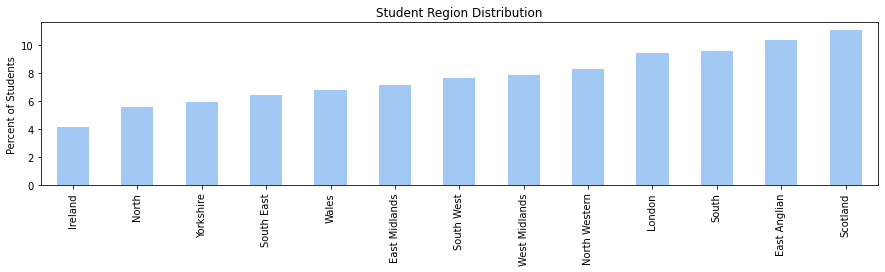

In [147]:
# set the color palette for graph
sns.set_palette('pastel')

# make a bar graph with a normalized y axis of percent of students per region
plt.figure(figsize=(15, 3))
plt.title('Student Region Distribution')
ax = (pd.Series(train['region']).value_counts(normalize=True, ascending=True)*100).plot.bar().set(ylabel='Percent of Students')
plt.show()

In [148]:
region_vals = dataframe(round(train['region'].value_counts(normalize=True, ascending=True)*100,2)).rename(columns={'region':'Percentage'}).transpose()
scotland = region_vals['Scotland'][0]
ireland = region_vals['Ireland'][0]
wales = region_vals['Wales'][0]
england = region_vals.transpose()['Percentage'].sum() - ireland - scotland - wales
md(f'''
Above, we can see the distribution of students by region. Our students come from various regions of the UK, Scotland, Ireland and Wales.
Scotland individually has the most students with {scotland}% of students. Ireland has the least amoung of students with 
{ireland}% of students. Most of our students come from various regions of England with {england}% of students.
''')


Above, we can see the distribution of students by region. Our students come from various regions of the UK, Scotland, Ireland and Wales.
Scotland individually has the most students with 11.03% of students. Ireland has the least amoung of students with 
4.13% of students. Most of our students come from various regions of England with 78.1% of students.


**IMD Band Counts**

Next, we will look at the distribution of our students per deprivation band.

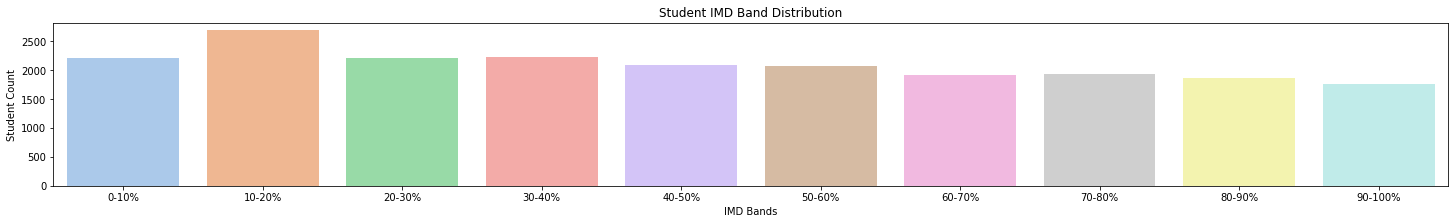

In [149]:
# sorted list of unique imd categories
imds = train[train['imd'].notna()]['imd'].sort_values().unique()

# create a count plot of number of students per imd band ordered by band valuesa
plt.figure(figsize=(25, 3))
plt.title('Student IMD Band Distribution')
sns.countplot(data=train, x=train['imd'], order=imds).set(xlabel='IMD Bands', ylabel='Student Count')
plt.show()

In the above bar graph we see the distribution of students by IMD band. Many students seem to be in more deprived areas with a spike in students in the 10-20% band.

**Age Percentages**

Next, we will look at the distrubtion of age bands for our students.

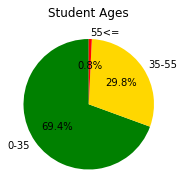

In [150]:
# ordered list of age_band possibilities
ages = train['age'].sort_values().unique()

# normalized value counts of age bands
age_freqs = train['age'].value_counts(normalize=True)

age_colors = ['green', 'gold', 'red']

# make a pie chart of age groups in our data
plt.figure(figsize=(25, 3))
plt.title('Student Ages')
plt.pie(data=train, x=age_freqs, labels=ages, autopct='%1.1f%%', startangle=90, colors=age_colors)
plt.show()

In the above pie chart of age bands we can see that nearly 70% of our students are under 35, just under 30% of our students and under 1% of students are age 55+.

**Gender Counts**

In this section we will look at the distribution of male vs female students.

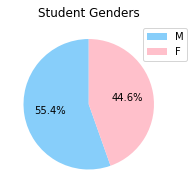

In [151]:
# list of possible genders in data
genders = ['M', 'F']

# get normalized value counts of genders in data
gender_freqs = train['gender'].value_counts(normalize=True)

gen_colors = ['lightskyblue', 'pink']

# make a pie chart of overall gender distribution
plt.figure(figsize=(25, 3))
plt.title('Student Genders')
plt.pie(data=train, x=gender_freqs, autopct='%1.1f%%', startangle=90, colors=gen_colors)
plt.legend(labels=genders, bbox_to_anchor=(.8,1), loc='upper left') 
plt.show()

In the above pie chart of gender distributions we see that the genders are fairly evenly distributed with males being slightly more represented in our student sample.

**Education**

Here, we will observe the counts of students per level of education.

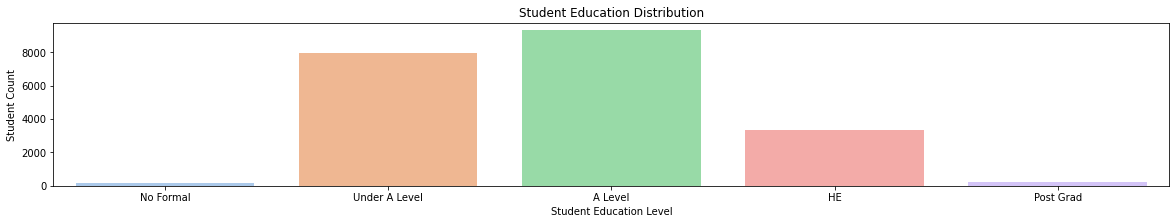

In [152]:
# list of education possibilities in order 
educations = ['No Formal', 'Under A Level', 'A Level', 'HE', 'Post Grad']

# create a bar graph/count plot of students per education level
plt.figure(figsize=(20, 3))
plt.title('Student Education Distribution')
sns.countplot(data=train, x=train['education'], order=educations).set(xlabel= 'Student Education Level', ylabel='Student Count')
plt.show()

In the above chart of the distribution of levels of formal education we see that most of our students fall Under A Level or at A Level as their furthest education. 

Post Grad Students and students with no formal education are underrespresented.

**Disability Percentage**

Finally, we will look at the percentage of disabled students we have vs total students.

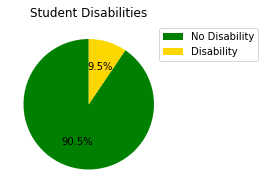

In [153]:
# ordered disability list
disabilities=['No Disability', 'Disability']

# get normalized value counts of disabilties in data
disability_freqs = train['disability'].value_counts(normalize=True)

dis_colors = ['green', 'gold']

# create pie chart of students with and without disabilities
plt.figure(figsize=(25, 3))
plt.title('Student Disabilities')
plt.pie(data=train, x=disability_freqs, autopct='%1.1f%%', startangle=90, colors=dis_colors)
plt.legend(labels=disabilities, loc='upper left', bbox_to_anchor=(.9,1))
plt.show()

In the above pie chart of the distribution of disabled to non-disabled students we see that under 10% of our students identified as having disabilities and so are underrepresented in this group.

### Student Results

Here, we will graphically observe the relationship between student results and their demographics.

First let's look at results for all students.

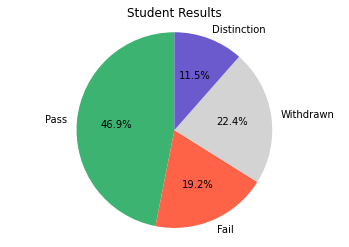

In [154]:
# list of result possibilities
results = ['Pass', 'Fail', 'Withdrawn', 'Distinction']

# get normalized value counts of results
result_freqs = train['result'].value_counts(normalize=True)

results_colors = ['MediumSeaGreen', 'Tomato', 'LightGray','SlateBlue']

# convert values to percentages
pass_perc = round((result_freqs[0] * 100), 1)
withdraw_perc = round((result_freqs[1] * 100), 1)
fail_perc = round((result_freqs[2] * 100), 1)
distinct_perc = round((result_freqs[3] * 100), 1)
results_percs = [pass_perc, fail_perc, withdraw_perc, distinct_perc]

# create pie chart of results by percentage
fig1, ax = plt.subplots()
ax.pie(results_percs, labels=results, autopct='%1.1f%%', startangle=90,colors=results_colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Student Results')
plt.show()

In [155]:
# get the percentage of students who failed or withdrew
neg_result = round(fail_perc + withdraw_perc)

# store the percentage of students who passed or passed with distinction
pos_result = round(pass_perc + distinct_perc)

md(f'''
Above we can see that students have a negative result of withdrawing or failing nearly **{neg_result}%** of the time,
with around **{pos_result}%** of students achieving a positive result of passing or passing with distinction.
''')


Above we can see that students have a negative result of withdrawing or failing nearly **42%** of the time,
with around **58%** of students achieving a positive result of passing or passing with distinction.


**Adding Features**

For some of our analysis it is less useful to observe each result and may be beneficial to just look at positive and negative results. In this interest we will create a new column `result_class` in which we will classify results as positive or negative. Positive results will be passing or passing with distinction and negative results will be failing or withdrawal.

Class size may play a role in student results due to teachers being less available in courses with more students. In the interest of this potential
will add the column `class_size` reflecting the size of the class each student is enrolled in.

In [156]:
# add column`result_class` with positive for passing and distinction and negative for failing and withdrawal
train.loc[(train['result'] == 'Pass') | (train['result'] == 'Distinction'), 'result_class'] = 'Pos'
train.loc[(train['result'] == 'Fail') | (train['result'] == 'Withdrawn'), 'result_class'] = 'Neg'

# same manipulation to test set
test.loc[(test['result'] == 'Pass') | (test['result'] == 'Distinction'), 'result_class'] = 'Pos'
test.loc[(test['result'] == 'Fail') | (test['result'] == 'Withdrawn'), 'result_class'] = 'Neg'

In [157]:
# make a pivot table with the count of student id's per module/presentation
class_size = train.pivot_table(values='id_student', index='module_presentation', aggfunc='count')

# merge student info with the class size table to add class size to student info in train/test sets
train = train.merge(class_size, how='outer', on='module_presentation')
test = test.merge(class_size, how='outer', on='module_presentation')

# rename the duped id student column to the appropriate class_size
train.rename(columns={'id_student_y':'class_size', 'id_student_x':'id_student'}, inplace=True)
test.rename(columns={'id_student_y':'class_size', 'id_student_x':'id_student'}, inplace=True)



# merge assessments info with the class size table to add class size to assessments
merged_assessments = merged_assessments.merge(class_size, how='outer', on='module_presentation')

# rename the duped id student column to the appropriate class_size
merged_assessments.rename(columns={'id_student_y':'class_size', 'id_student_x':'id_student'}, inplace=True)

In [158]:
dataframe(train['class_size'].describe())

,class_size
count,21010.000000
mean,1125.220562
std,365.122483
min,274.000000
25%,862.000000
50%,1158.000000
75%,1438.000000
max,1691.000000


We can see above in our new `class_size` column that each class has between 274 and 1691 students. We will seperate these into 3 bins for our categorical analysis: Under 750, 750-1200, and Over 1200 students.

In [159]:
train

,module_presentation,module,presentation,id_student,region,imd,age,gender,education,disability,date_registration,attempts,credits,avg_score,sum_click,avg_click,result,result_class,class_size
0,FFF2013J,FFF,2013J,589003,South East,30-40%,0-35,M,A Level,N,-74,0,120,70.083333,4679,4.08,Pass,Pos,1509
1,FFF2013J,FFF,2013J,568333,South West,40-50%,0-35,M,Under A Level,Y,-123,0,120,87.916667,6250,4.69,Pass,Pos,1509
2,FFF2013J,FFF,2013J,606079,Yorkshire,50-60%,35-55,M,A Level,N,-28,0,120,71.0,2464,3.96,Fail,Neg,1509
3,FFF2013J,FFF,2013J,416696,Scotland,20-30%,0-35,F,HE,N,-22,1,60,73.5,2251,4.08,Withdrawn,Neg,1509
4,FFF2013J,FFF,2013J,594205,North Western,70-80%,0-35,M,A Level,Y,-46,0,120,77.083333,2231,4.76,Pass,Pos,1509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,AAA2013J,AAA,2013J,2555340,South,90-100%,35-55,F,HE,N,-67,0,60,80.6,4441,4.28,Pass,Pos,294
21006,AAA2013J,AAA,2013J,286488,South East,90-100%,35-55,M,A Level,N,-8,0,60,71.0,1046,3.68,Pass,Pos,294
21007,AAA2013J,AAA,2013J,240884,South,90-100%,0-35,M,A Level,N,-47,0,120,58.4,427,2.24,Pass,Pos,294
21008,AAA2013J,AAA,2013J,172112,Ireland,0-10%,35-55,M,HE,N,-50,0,60,69.6,1939,2.78,Pass,Pos,294


In [160]:
# where class size is under 750 make class_size_ban value to Under 750
train.loc[train['class_size'] < 750, 'class_size_bin']  = 'Under 750'

# where class size is between 750 and 1200 make class_size_ban value to 750-1200
train.loc[(train['class_size'] > 750) & (train['class_size'] < 1200), 'class_size_bin']= '750-1200'

#where class size is over 1200 change make class_size_ban to over 1200
train.loc[train['class_size'] > 1200, 'class_size_bin'] = 'Over 1200'

In [161]:
# do the same manipulations to the test set
test.loc[test['class_size'] < 750, 'class_size_bin']  = 'Under 750'
test.loc[(test['class_size'] > 750) & (train['class_size'] < 1200), 'class_size_bin']= '750-1200'
test.loc[test['class_size'] > 1200, 'class_size_bin'] = 'Over 1200'

**Results per Region**

In this section we will look at the positive vs negative results by region.

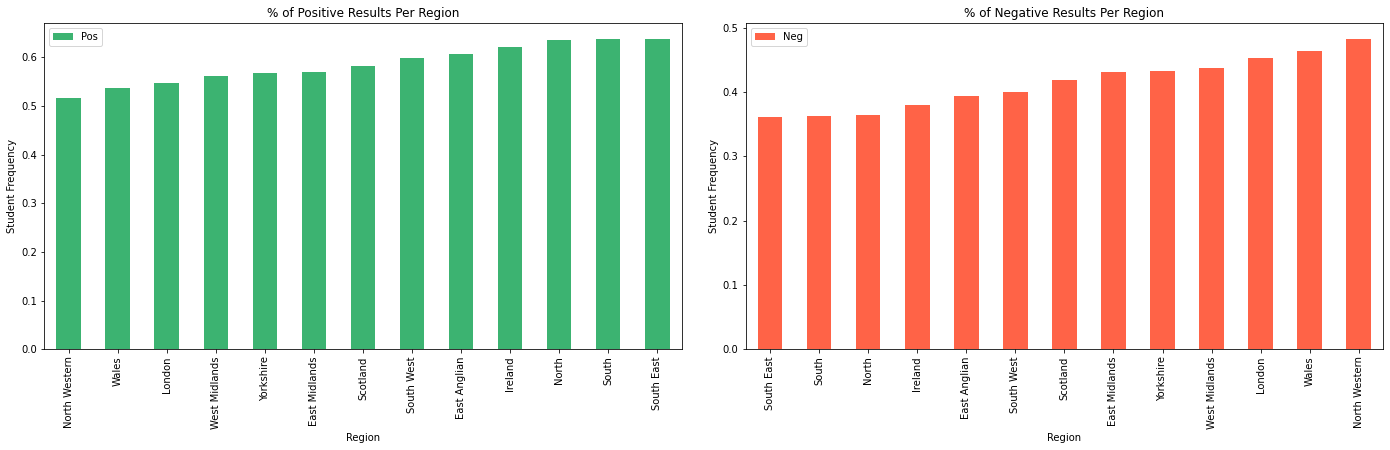

In [162]:
# get bar charts of frequencies per result per module/presentation
nrows = 1
ncols = 2
fig, axes = plt.subplots(figsize=(24, 6) , nrows = nrows, ncols = ncols)
plt.subplots_adjust(wspace=.1, hspace=.3)
region_res_freq = pd.crosstab(train['region'], values=train['result_class'], columns=train['result_class'], aggfunc='count', normalize='index').reset_index()
region_res_freq.sort_values(by='Pos').plot.bar(rot=90, ax=axes[0], x='region', y='Pos', title='% of Positive Results Per Region', xlabel='Region', ylabel='Student Frequency', color='MediumSeaGreen')
region_res_freq.sort_values(by='Neg').plot.bar(rot=90, ax=axes[1], x='region', y='Neg', title='% of Negative Results Per Region', xlabel='Region', ylabel='Student Frequency', color='Tomato')
plt.show()

Above we can see that Ireland, though it had the lowest number of students. Let's now look at IMD bands and the results of students based on their IMD band. 

**Results per IMD Band**

Now, we will look at the positive vs negative results per IMD band.

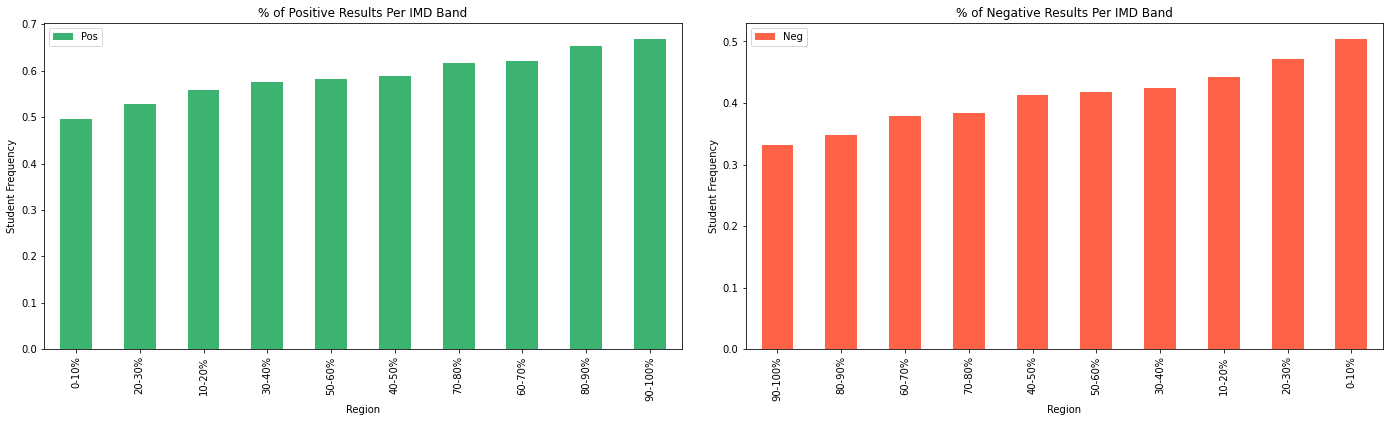

In [163]:
# get bar charts of frequencies per result per module/presentation
nrows = 1
ncols = 2
fig, axes = plt.subplots(figsize=(24, 6) , nrows = nrows, ncols = ncols)
plt.subplots_adjust(wspace=.1, hspace=.3)
region_res_freq = pd.crosstab(train['imd'], values=train['result_class'], columns=train['result_class'], aggfunc='count', normalize='index').reset_index()
region_res_freq.sort_values(by='Pos').plot.bar(rot=90, ax=axes[0], x='imd', y='Pos', title='% of Positive Results Per IMD Band', xlabel='Region', ylabel='Student Frequency', color='MediumSeaGreen')
region_res_freq.sort_values(by='Neg').plot.bar(rot=90, ax=axes[1], x='imd', y='Neg', title='% of Negative Results Per IMD Band', xlabel='Region', ylabel='Student Frequency', color='Tomato')
plt.show()

It is clear in the above charts that students from more deprived areas are failing and withdrawing more. In fact it runs almost consecutively where the more deprived an area, the worse a student does and vice versa. 

**Results per Age Group**

Next, we will look at how the different age groups fared for their results.

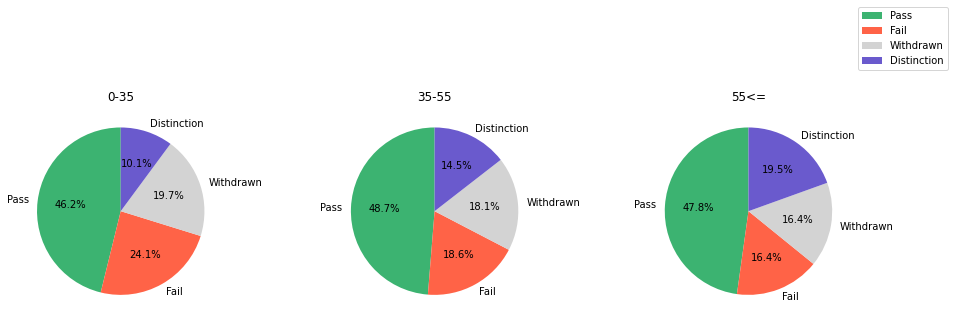

In [164]:
# get crosstab of student result counts per module/presentation
age_res_freq = pd.crosstab(train['age'], values=train['result'], columns=train['result'], aggfunc='count', normalize='index')

# ordered list of results
age_res_freq = age_res_freq[['Pass', 'Fail', 'Withdrawn', 'Distinction']]

# make pie charts of results per module/presentation
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

for i, (idx, row) in enumerate(age_res_freq.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle=90, labels=results, autopct='%1.1f%%', colors=results_colors)
    ax.set_title(idx)
else:
    [ax.set_visible(False) for ax in axes.flatten()[i+1:]]
    
ax.legend(labels=results, bbox_to_anchor=(1,1.5), loc='upper left') 
fig.subplots_adjust(wspace=.5)

In these pie charts we can see that each age group has a very similar distribution of overall results. The noticable difference is older students seem to be more likely to pass with distinction.

**Results per Gender**

Now, we will see if gender played a role in student results.

<ipython-input-165-565771bd74cd>:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(row, startangle=90, labels=results, autopct='%1.1f%%', colors=results_colors)


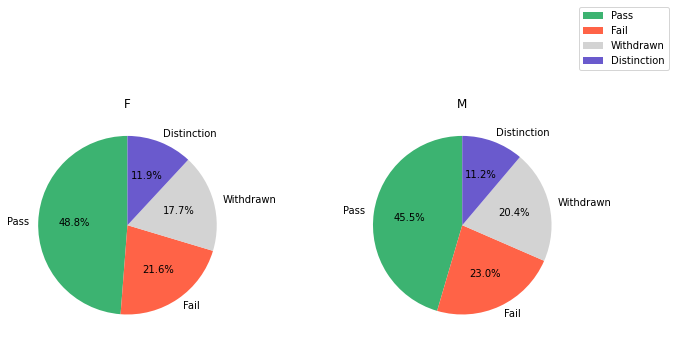

In [165]:
# get crosstab of student result counts per module/presentation
gen_res_freq = pd.crosstab(train['gender'], values=train['result'], columns=train['result'], aggfunc='count', normalize='index')

# ordered list of results
gen_res_freq = gen_res_freq[['Pass', 'Fail', 'Withdrawn', 'Distinction']]

# make pie charts of results per module/presentation
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, (idx, row) in enumerate(gen_res_freq.iterrows()):
    ax = axes[i // 2, i % 2]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle=90, labels=results, autopct='%1.1f%%', colors=results_colors)
    ax.set_title(idx)
else:
    [ax.set_visible(False) for ax in axes.flatten()[i+1:]]
    
ax.legend(labels=results, bbox_to_anchor=(1,1.5), loc='upper left') 
fig.subplots_adjust(wspace=.5)

In these pie charts of result per gender we can see  taht each gender seems to perform similarly in courses.

**Results per disability**

Next, let's look to see if a student's disability status is related to their outcomes.

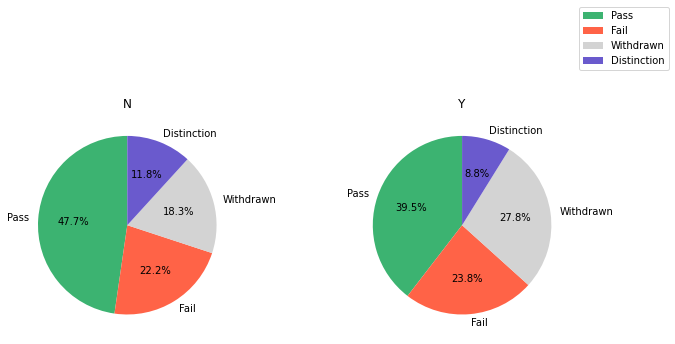

In [166]:
# get crosstab of student result counts per module/presentation
dis_res_freq = pd.crosstab(train['disability'], values=train['result'], columns=train['result'], aggfunc='count', normalize='index')

# ordered list of results
dis_res_freq = dis_res_freq[['Pass', 'Fail', 'Withdrawn', 'Distinction']]

# make pie charts of results per module/presentation
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, (idx, row) in enumerate(dis_res_freq.iterrows()):
    ax = axes[i // 2, i % 2]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle=90, labels=results, autopct='%1.1f%%', colors=results_colors)
    ax.set_title(idx)
else:
    [ax.set_visible(False) for ax in axes.flatten()[i+1:]]
    
ax.legend(labels=results, bbox_to_anchor=(1,1.5), loc='upper left') 
fig.subplots_adjust(wspace=.5)

In these charts of resultes per disability identificaiton we see that disabled students do not seem to be failing much more frequently, but the withdrawal rate is much higher in students who identify as having a disability.

From these charts of student gender distribution per module it seems that GGG and BBB courses attract many more females than males, while The rest of the courses are dominated by male students.

**Results per Highest Education**

Finally, let's look at the student results per their level of highest education.

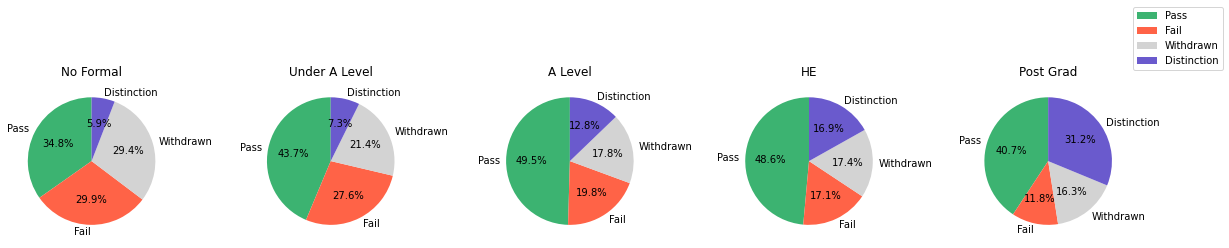

In [167]:
# get crosstab of student result counts per module/presentation
edu_res_freq = pd.crosstab(train['education'], values=train['result'], columns=train['result'], aggfunc='count', normalize='index').reindex(educations)

# ordered list of results
edu_res_freq = edu_res_freq[['Pass', 'Fail', 'Withdrawn', 'Distinction']]

# make pie charts of results per module/presentation
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

for i, (idx, row) in enumerate(edu_res_freq.iterrows()):
    ax = axes[i // 5, i % 5]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle=90, labels=results, autopct='%1.1f%%', colors=results_colors)
    ax.set_title(idx)
else:
    [ax.set_visible(False) for ax in axes.flatten()[i+1:]]
    
ax.legend(labels=results, bbox_to_anchor=(1,1.5), loc='upper left') 
fig.subplots_adjust(wspace=.5)

The percentage of students who either pass or pass with distinction goes up linearly with education level. The percentage of students who fail or withdraw also goes down linearly with education level.

### Student Scores

Here we will look at the relationship between average scores and demographics. It may be presumable that the relationships would be the same as results, but since scores are weighted differently, the analysis of scores to other factors may provide interesting insights.

**Scores per Assessment Type**

Here we will look at our merged_assessments dataframe to get scores per assessment type.

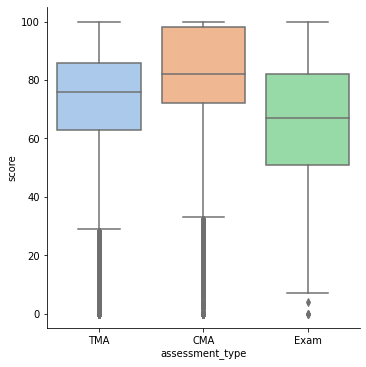

In [168]:
# make a box plot of each assessment type and their scores
sns.catplot(x='assessment_type', y='score', data=merged_assessments, kind='box')
plt.show()

According to our plots above computer marked exams get the best average scores, followed by the tutor marked exams and then the final exams.

**Scores per Sum of Clicks**

Here we will look at our students average score as compared to their total clicks for the course.

In [169]:
# store the correlation coef of sum_click to score
click_to_score = train['sum_click'].astype(int).corr(train['avg_score'].astype(int))

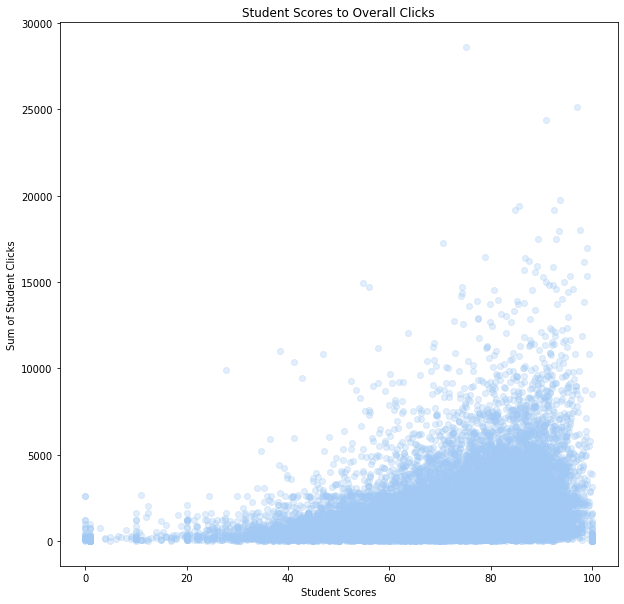

In [170]:
# make a scatter plot of sum click to score
plt.figure(figsize=(10, 10))
plt.title('Student Scores to Overall Clicks')
plt.xlabel("Student Scores")
plt.ylabel("Sum of Student Clicks")
plt.scatter(data=train, y='sum_click', x='avg_score', alpha=.3)
plt.show()

In [171]:
md(f'''
In the above scatter plot we see that there is a very weak positive correlation according to our correlational coefficient of 
{round(click_to_score, 2)} between with the sum of clicks and student score. Interestingly there is a spike of scores at 0 where 
it looks like students with no clicks do better than students with around 5-20 clicks. 

Let's take a look at these students who have high scores, but low clicks.
''')


In the above scatter plot we see that there is a very weak positive correlation according to our correlational coefficient of 
0.26 between with the sum of clicks and student score. Interestingly there is a spike of scores at 0 where 
it looks like students with no clicks do better than students with around 5-20 clicks. 

Let's take a look at these students who have high scores, but low clicks.


In [172]:
# dataframe of students who had a sum click of under 1000 
train[train['sum_click'] < 1000].sort_values('avg_score', ascending=False).head(40)

,module_presentation,module,presentation,id_student,region,imd,age,gender,education,disability,date_registration,attempts,credits,avg_score,sum_click,avg_click,result,result_class,class_size,class_size_bin
13690,BBB2014J,BBB,2014J,592262,South West,90-100%,0-35,M,Under A Level,N,-30,1,60,100.0,192,2.04,Withdrawn,Neg,1438,Over 1200
13389,BBB2014J,BBB,2014J,696890,Scotland,60-70%,35-55,F,A Level,N,-17,0,120,100.0,324,2.84,Withdrawn,Neg,1438,Over 1200
13358,BBB2014J,BBB,2014J,630286,Scotland,0-10%,0-35,F,Under A Level,N,-93,0,120,100.0,232,3.8,Fail,Neg,1438,Over 1200
1598,BBB2014B,BBB,2014B,635473,North Western,70-80%,0-35,M,HE,N,-24,0,120,100.0,148,2.11,Fail,Neg,967,750-1200
13322,BBB2014J,BBB,2014J,306880,Wales,20-30%,0-35,F,Under A Level,N,-75,0,90,100.0,132,3.22,Withdrawn,Neg,1438,Over 1200
13314,BBB2014J,BBB,2014J,2177423,East Anglian,50-60%,35-55,F,Under A Level,N,-147,3,60,100.0,334,2.76,Withdrawn,Neg,1438,Over 1200
13305,BBB2014J,BBB,2014J,549288,East Anglian,90-100%,0-35,F,A Level,N,-77,0,120,100.0,54,1.86,Withdrawn,Neg,1438,Over 1200
13300,BBB2014J,BBB,2014J,681752,Scotland,50-60%,35-55,F,HE,N,-60,0,120,100.0,97,2.37,Fail,Neg,1438,Over 1200
13274,BBB2014J,BBB,2014J,600404,North Western,40-50%,35-55,F,Under A Level,N,-49,0,60,100.0,134,2.58,Fail,Neg,1438,Over 1200
13270,BBB2014J,BBB,2014J,638554,East Anglian,40-50%,0-35,F,HE,N,-162,0,60,100.0,233,2.88,Withdrawn,Neg,1438,Over 1200


The above dataframe contains all students who have high scores and low clicks.

Taking a look at the top 40 scores in students who had a sum_click under 20 but great scores, it looks like many are from the BBB module, the date submitted was either -1, the day before the course began, or otherwise very early in the course and the weight of these exams were zero to one. Perhaps this exam was one where students could not get wrong answers. 

Let's pick one of these zero weight exams and see what scores other students received.

In [173]:
# dataframe of students with 15003 assessment id and their scores
dataframe(merged_assessments[merged_assessments['id_assessment'] =='15003'].sort_values('score')['score'].value_counts(normalize=True))

,score
100.0,0.738399
80.0,0.211836
60.0,0.040350
40.0,0.008070
20.0,0.001345


Based on the above dataframe of score frequency for this exam this was probably an easy exam as so many students got 100 points. It is exams like this that are causing our spike at zero though.

The relationship between average clicks is likely to be similar, but let's see what we can see.

**Average Scores per Average Clicks**

Here we will look at the how the average number of clicks per day relate to assessment average scores

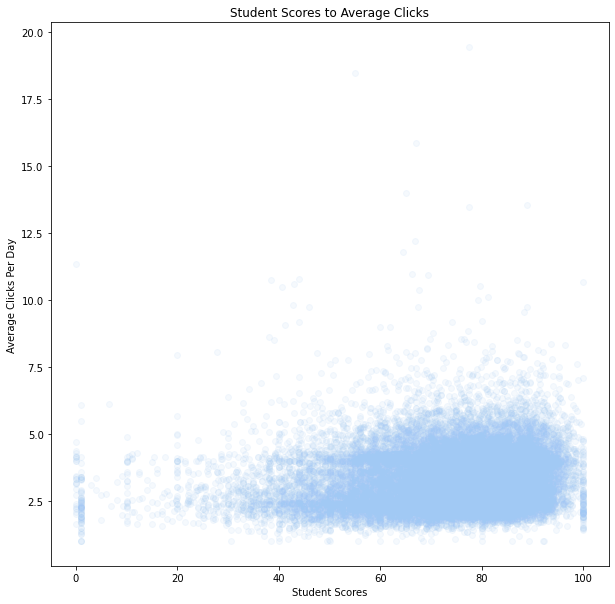

In [174]:
# make a scatter plot of average click to score
plt.figure(figsize=(10, 10))
plt.title('Student Scores to Average Clicks')
plt.xlabel("Student Scores")
plt.ylabel("Average Clicks Per Day")
plt.scatter(data=train, y='avg_click', x='avg_score', alpha=.1)
plt.show()

In [175]:
avg_click_to_score = merged_assessments['avg_click'].astype(int).corr(merged_assessments['score'].astype(int))

md(f'''
In the above scatterplot of score to student click data the same relationship seems to hold, where average clicks per day seem 
to be related to increased scores with a very weak, positive relationship of {round(avg_click_to_score,2)} but the overall effects 
seem to have a peak at around 6 clicks per day, where after that there is not much of a score increase per average click.  
Students who got 100s on their exams do seem to have a much higher click average than their peers.

avg_click seems to be a worse predictor than sum_click though and will be dropped from our analysis later
''')


In the above scatterplot of score to student click data the same relationship seems to hold, where average clicks per day seem 
to be related to increased scores with a very weak, positive relationship of 0.09 but the overall effects 
seem to have a peak at around 6 clicks per day, where after that there is not much of a score increase per average click.  
Students who got 100s on their exams do seem to have a much higher click average than their peers.

avg_click seems to be a worse predictor than sum_click though and will be dropped from our analysis later


**Assessment Weight to Score**

Here we will look at the merged_assessments dataframe to see if there is a relationship between assessment weight and score

In [176]:
# get the correlation coef between exam weight and score
weight_to_score = merged_assessments['weight'].astype(int).corr(merged_assessments['score'].astype(int))

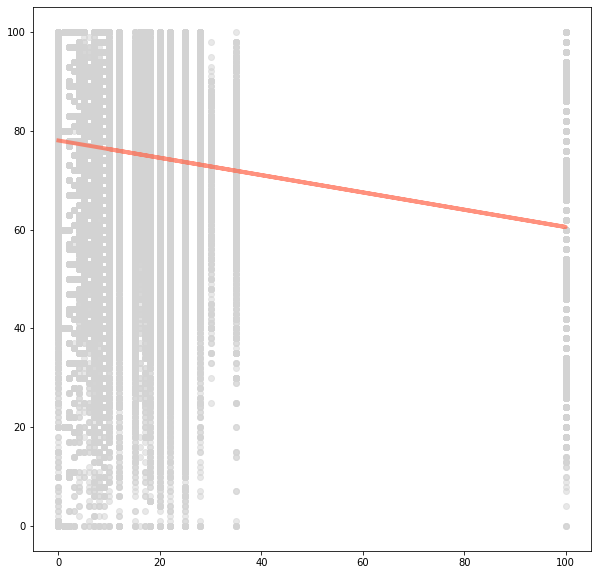

In [177]:
# Make a scatterplot for exam weight to score
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['weight'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
# add a line of best fit to scatterplot
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)
plt.show()

In [178]:
md(f'''
In the above scatterplot we see the relationship between exam weight and student score.

There is a very weak negative correlation of {round(weight_to_score)}, so It does seem as the assessment weight increases 
the average score goes down. There is a large gap in our data though since the non-final exams only go up to weight 35. 
This might dramatize our relationship here. Let's see if this relationship holds true for exams under weight 100
''')


In the above scatterplot we see the relationship between exam weight and student score.

There is a very weak negative correlation of 0, so It does seem as the assessment weight increases 
the average score goes down. There is a large gap in our data though since the non-final exams only go up to weight 35. 
This might dramatize our relationship here. Let's see if this relationship holds true for exams under weight 100


In [179]:
under_50_weight = merged_assessments.loc[merged_assessments['weight'] < 100]
under_50_weight_to_score = under_50_weight['weight'].astype(int).corr(under_50_weight['score'].astype(int))

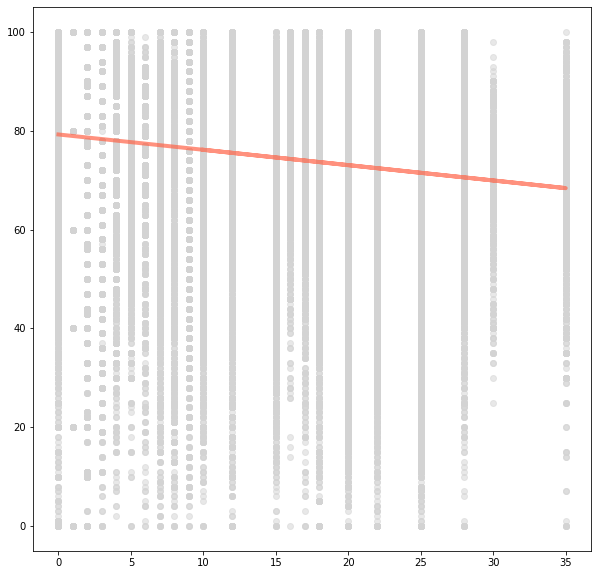

In [180]:
# create a scatterplot of the exam weight to score of exams weighted under 50
plt.figure(figsize=(10, 10))
x = np.array(under_50_weight['weight'].astype(int))
y = np.array(under_50_weight['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
# add a line of best fit to scatterplot
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)
plt.show()

In [181]:
md(f'''
Indeed we see in this scatterplot of exam weight of under 50 to student score that the exam scores do seem to 
get worse as the weight of the exams increases as we see here with a correlational coefficient of 
{round(under_50_weight_to_score, 2)}. We know the weight of the final exams is always 100,  
let's see the average weight of the tutor marked exams.
''')


Indeed we see in this scatterplot of exam weight of under 50 to student score that the exam scores do seem to 
get worse as the weight of the exams increases as we see here with a correlational coefficient of 
-0.17. We know the weight of the final exams is always 100,  
let's see the average weight of the tutor marked exams.


In [182]:
# create a table of the average weight of an exam per assessment type
pd.pivot_table(merged_assessments, index='assessment_type', values='weight', aggfunc='mean')

,weight
assessment_type,
CMA,1.271202
Exam,100.0
TMA,16.570495


In the above table of average exam weights per exam type we see that tutor marked exams carry a significantly higher weight than the computer marked exams

**Assessment Date to Score**

Here, we will look at the merged_assessments dataframe to see if there is a relationship between assessment date and score

In [183]:
# get the corr coef of date to score
date_to_score = merged_assessments['date'].astype(int).corr(merged_assessments['score'].astype(int))

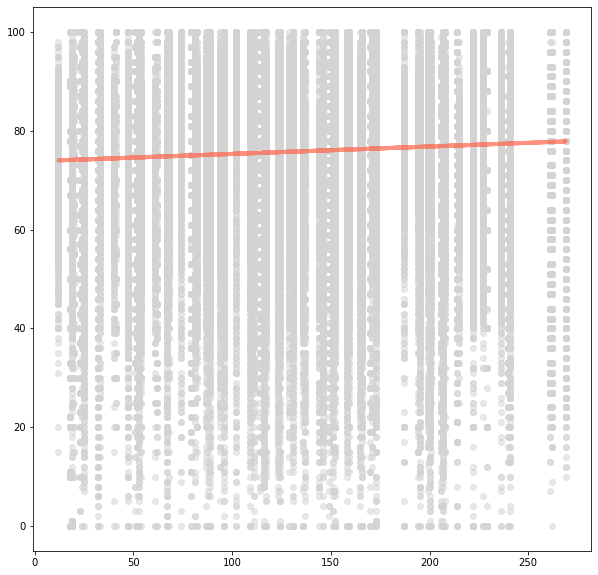

In [184]:
# create a scatterplot of date to score relationship
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['date'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
# add a line of best fit to scatterplot
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)
plt.show()

In the above scatter plot of student exam scores to date we see that according to our line of best fit the assessment scores are getting slightly better over time. 

**Date Submitted to Score**

Here we will look at the merged_assessments dataframe to see the relationship between date submitted and score.

In [185]:
# get the corr coef of date submitted to score
date_sub_to_score = merged_assessments['date_submitted'].astype(int).corr(merged_assessments['score'].astype(int))

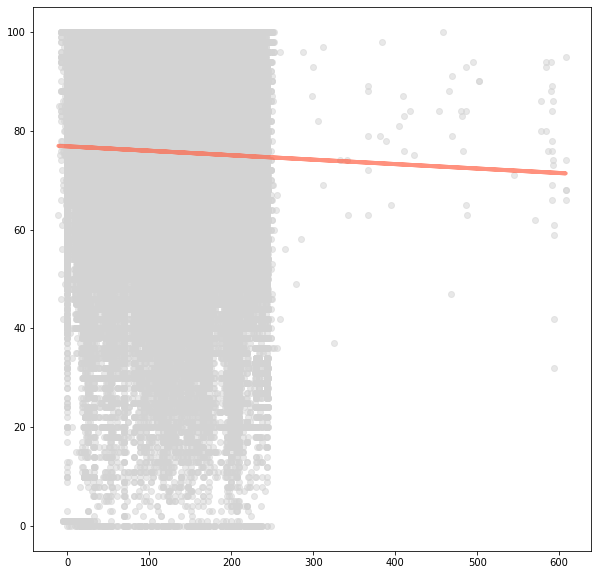

In [186]:
# create a scatterplot of date submitted to score relationship
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['date_submitted'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
# add a line of best fit to scatterplot
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)
plt.show()

According tho the above scatterplot of student submission date to student scores, it seems as the date submitted gets later and later, student scores get somewhat worse.

Let's see how, how many days late an assignment is affects the score by adding a column to indicate how many days late an assessment was by subtracting the `date` from `date_submitted`

**Lateness to Score**

Here we will observe the relationship between our new `days_late` column and assessment score.

In [187]:
# create a 'days_late' column by subtracting the date of the exam from the date the exam was submitted in both sets
merged_assessments['days_late'] = merged_assessments['date_submitted'] - merged_assessments['date']

In [188]:
# get the corr coef of latess to score
lateness_to_score = merged_assessments['days_late'].astype(int).corr(merged_assessments['score'].astype(int))

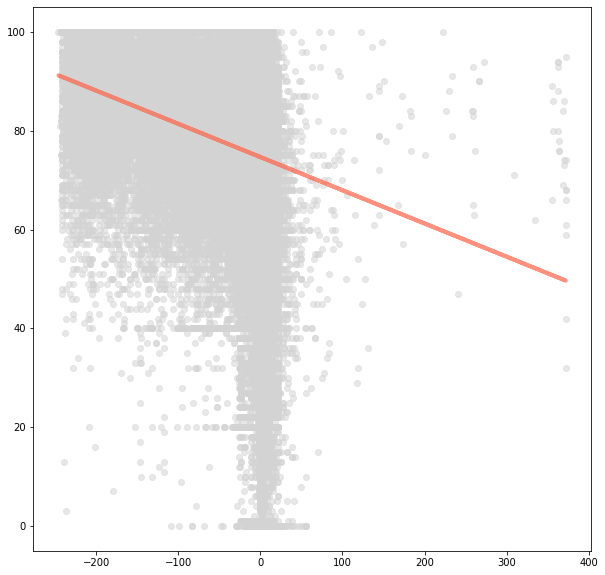

In [189]:
# create a scatterplot of exam lateness to score relationship
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['days_late'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
# add a line of best fit to scatterplot
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)
plt.show()

In the above scatterplot of days late to student score we can see here that students who turned in their exams earlier clearly got much better scores, and the later the exam turn in the worse the score trended toward. We also see that a great deal of students submitted their exams on time or early.

Days late may turn out to be a good predictor of student success. We will take the average days late per student and add that column to our train and test sets.

In [190]:
avg_late_days = pd.pivot_table(merged_assessments, index='id_student', values='days_late', aggfunc='mean')
train = train.merge(avg_late_days, how='left', on='id_student')
test = test.merge(avg_late_days, how='left', on='id_student')

**Class Size to Average Score**

Here we will look to see if there is a relationship between class size and average score.

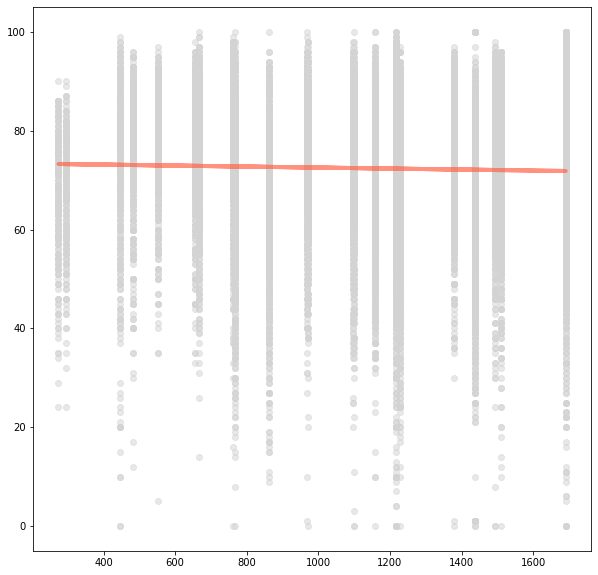

In [191]:
# create a scatterplot of exam lateness to score relationship
plt.figure(figsize=(10, 10)) 
x = np.array(train['class_size'].astype(int))
y = np.array(train['avg_score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
# add a line of best fit to scatterplot
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)
plt.show()

Class size may have a slightly negative correlation with score, but it is not terribly significant.

**Average Scores per Age Band**

Here, we will look at the average scores per age band.

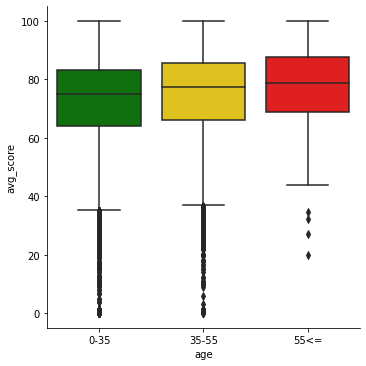

In [192]:
# make a catplot/boxplot of student age band vs their scores sorted in ascending order by score mean
sns.catplot(x='age', y='avg_score', data=train, kind='box', palette=age_colors)
plt.show()

According to the plot above of student age to score, the older the student, the higher the mean score, though only by a few points.

**Gender to Score**

Here, we will look at the average scores per gender.

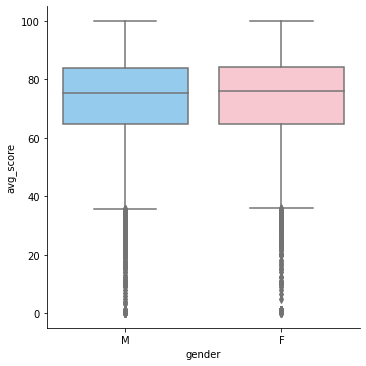

In [193]:
# make a catplot/boxplot of student gender vs their scores sorted in ascending order by score mean
sns.catplot(x='gender', y='avg_score', data=train, kind='box', palette=gen_colors)
plt.show()

According to the plot above of student gender to score each gender is performing similarly on exams score-wise with females having a slightly higher average score.

**Average Scores per Region**

Here, we will look at the average scores per region.

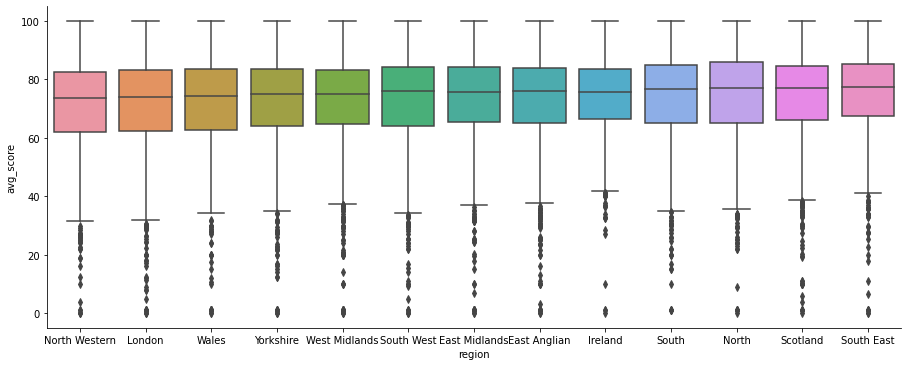

In [194]:
# make a catplot/boxplot of student region vs their scores sorted in ascending order by score mean
sorted_region_mean = train.groupby(by=['region'])['avg_score'].mean().sort_values().index
sns.catplot(x='region', y='avg_score', data=train, kind='box', aspect=20.7/8.27, order=sorted_region_mean)
plt.show()

According to the plot above of student region to score the mean score per region is similar across the board.

**Average Scores per IMD Band**

Here, we will look at the average scores per IMD band.

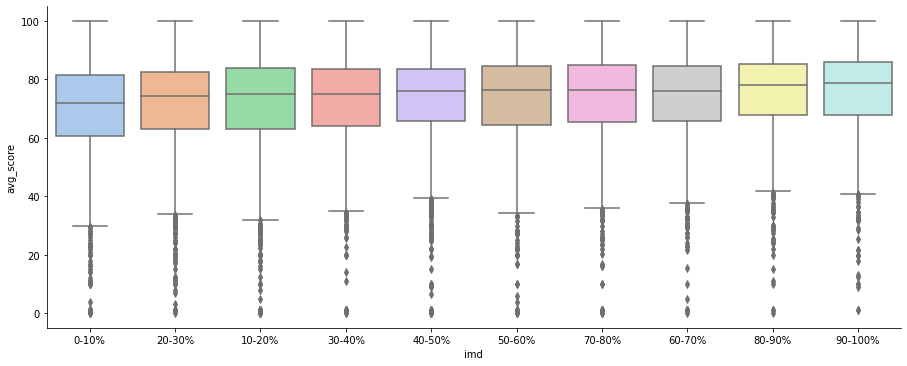

In [195]:
# make a catplot/boxplot of student IMD bands vs their scores sorted in ascending order by mean
sorted_imd_mean = train.groupby(by=['imd'])['avg_score'].mean().sort_values().index
sns.catplot(x='imd', y='avg_score', data=train, kind='box', order=sorted_imd_mean, aspect=20.7/8.27)
plt.show()

According to the plot of student IMD band to score above, the mean assessment score goes up with IMD Band similar to what we saw in results.

**Average Scores per Highest Education**

Here, we will look at the average scores per education level.

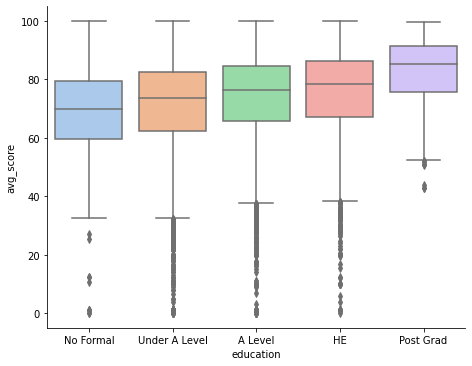

In [196]:
# make a catplot/boxplot of student education vs their scores sorted in ascending order by mean
sorted_edu_mean = train.groupby(by=['education'])['avg_score'].mean().sort_values().index
sns.catplot(x='education', y='avg_score', data=train, kind='box',order=sorted_edu_mean, aspect=10.7/8.27)
plt.show()

In our plot of student education to score shown above, the mean score imporoves notably with education.

**Scores per Disability Status**

Here, we will look at the average scores per disability status.

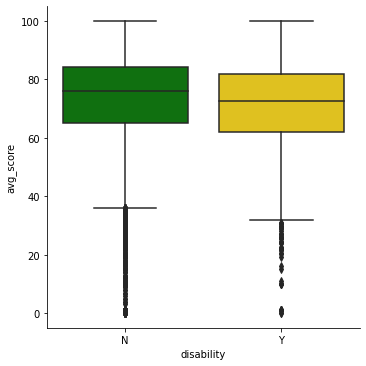

In [197]:
# make a catplot/boxplot of scores per disability category sorted in ascending order by mean
sns.catplot(x='disability', y='avg_score', data=train, kind='box', palette=dis_colors)
plt.show()

In this plot of student disability to score disabled students are performting worse on their exams by a few points on average.

## Final Cleaning

* For ages we see that there is less than 1% of people in the 55 and over range and so we will combine that with the 35-55 range to make two ranges: 0-35 and 35+

* We will be using classification to identify students as having negative or positive results and so will use our `result_class` column but change 'Pos' to and 'Neg' to 0 since numerical data is easier to model.

* We can merge the courses and student information data frames to add the course length to student information as a potential predictor of student success.

* We will change the categorical columns to the `category` datatype so it is better recognized by pandas when it is time to get dummy one hot values for categories.

In [198]:
train

,module_presentation,module,presentation,id_student,region,imd,age,gender,education,disability,...,attempts,credits,avg_score,sum_click,avg_click,result,result_class,class_size,class_size_bin,days_late
0,FFF2013J,FFF,2013J,589003,South East,30-40%,0-35,M,A Level,N,...,0,120,70.083333,4679,4.08,Pass,Pos,1509,Over 1200,-59.166667
1,FFF2013J,FFF,2013J,568333,South West,40-50%,0-35,M,Under A Level,Y,...,0,120,87.916667,6250,4.69,Pass,Pos,1509,Over 1200,-59.166667
2,FFF2013J,FFF,2013J,606079,Yorkshire,50-60%,35-55,M,A Level,N,...,0,120,71.0,2464,3.96,Fail,Neg,1509,Over 1200,0.0
3,FFF2013J,FFF,2013J,416696,Scotland,20-30%,0-35,F,HE,N,...,1,60,73.5,2251,4.08,Withdrawn,Neg,1509,Over 1200,-37.75
4,FFF2013J,FFF,2013J,594205,North Western,70-80%,0-35,M,A Level,Y,...,0,120,77.083333,2231,4.76,Pass,Pos,1509,Over 1200,-29.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,AAA2013J,AAA,2013J,2555340,South,90-100%,35-55,F,HE,N,...,0,60,80.6,4441,4.28,Pass,Pos,294,Under 750,-1.4
21006,AAA2013J,AAA,2013J,286488,South East,90-100%,35-55,M,A Level,N,...,0,60,71.0,1046,3.68,Pass,Pos,294,Under 750,2.0
21007,AAA2013J,AAA,2013J,240884,South,90-100%,0-35,M,A Level,N,...,0,120,58.4,427,2.24,Pass,Pos,294,Under 750,-2.0
21008,AAA2013J,AAA,2013J,172112,Ireland,0-10%,35-55,M,HE,N,...,0,60,69.6,1939,2.78,Pass,Pos,294,Under 750,7.0


In [200]:
# replace ages and results values to be more model-friendly in train and test sets
train = train.replace({'age':{'55<=':'35+', '35-55':'35+'}, 'result_class':{'Pos':1, 'Neg':0}})
test = test.replace({'age':{'55<=':'35+', '35-55':'35+'}, 'result_class':{'Pos':1, 'Neg':0}})
train = train.drop(columns=['result', 'class_size_bin'])
test = test.drop(columns=['result', 'class_size_bin'])

# create course_length column in test/train set
train['course_length'] = 0
test['course_length'] = 0

# assign course_length from courses dataframe to training set for appropriate module/presentation
for index, row in train.iterrows():
    # change assessments date at current index to the course_length found in courses by locating the matching module/presentation
    train.at[index, 'course_length'] = courses.loc[(courses['module'] == row['module']) & (courses['presentation'] == row['presentation']), 'course_length']

# assign course_length from courses dataframe to testing set for appropriate module/presentation
for index, row in test.iterrows():
    test.at[index, 'course_length'] = courses.loc[(courses['module'] == row['module']) & (courses['presentation'] == row['presentation']), 'course_length']

# change categorical columns to category to better be identified when making dummy values
train = train.astype({'region':'category', 'imd':'category', 'education':'category', 'disability':'category', 'gender':'category', 'age':'category'})
test = test.astype({'region':'category', 'imd':'category', 'education':'category', 'disability':'category', 'gender':'category', 'age':'category'})

# change order of rows to remove target/to make sense
train = train[['region', 'imd', 'age', 'gender', 'education', 'disability', 'date_registration', 'attempts', 'credits', 'class_size', 'course_length', 'avg_score', 'days_late', 'sum_click', 'avg_click', 'result_class']]
test = test[['region', 'imd', 'age', 'gender', 'education', 'disability', 'date_registration', 'attempts', 'credits', 'class_size', 'avg_score', 'days_late', 'course_length', 'sum_click', 'avg_click', 'result_class']]


## Modeling
---

In this section we will be using classification for the the student info/result dataframe to find the best predictors of student outcome.

In [201]:
# import sklearn libraries
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2 
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression, Lasso, ElasticNet

In [202]:
import warnings
warnings.filterwarnings('ignore')

### Classification

For our classification problem with this dataset, we will be using the student info to predict student outcome as negative or positive. A negative result in this case would be for the student to withdraw from or fail the course and a positive result would be a result of passing or passing with distinction. We will be using features in our student info dataframe to predict these outcome.

First we must seperate our classification testing and training data into labels and targets.

In [203]:
# seperate training and testing sets into features and labels
X_train, Y_train, X_test, Y_test = pd.get_dummies(train.iloc[:,0:-1]), train.iloc[:,-1:], pd.get_dummies(test.iloc[:,0:-1]), test.iloc[:,-1:]

Next we will find the features most highly correlated with student result. To do this we will use sklearns SelectKBest to find the features with the best scores.

In [204]:
# get kbest score for each feature
kbest = dataframe(get_kbest(X_train, Y_train))

# rename df columns to match content & reorder
kbest.rename(columns={0:'Score', 1:'Feature'})[['Feature', 'Score']]

,Feature,Score
0,avg_score,0.170601
1,days_late,0.147491
2,sum_click,0.092814
3,avg_click,0.017894
4,education_A Level,0.013028
5,attempts,0.012769
6,class_size,0.010407
7,education_HE,0.009719
8,imd_10-20%,0.009705
9,education_Under A Level,0.009583


In [205]:
train.head()

,region,imd,age,gender,education,disability,date_registration,attempts,credits,class_size,course_length,avg_score,days_late,sum_click,avg_click,result_class
0,South East,30-40%,0-35,M,A Level,N,-74,0,120,1509,268,70.083333,-59.166667,4679,4.08,1
1,South West,40-50%,0-35,M,Under A Level,Y,-123,0,120,1509,268,87.916667,-59.166667,6250,4.69,1
2,Yorkshire,50-60%,35+,M,A Level,N,-28,0,120,1509,268,71.0,0.0,2464,3.96,0
3,Scotland,20-30%,0-35,F,HE,N,-22,1,60,1509,268,73.5,-37.75,2251,4.08,0
4,North Western,70-80%,0-35,M,A Level,Y,-46,0,120,1509,268,77.083333,-29.416667,2231,4.76,1


Above we can see each of our features and their score through SelectKBest.

Of these, we see our numerical features `avg_score`, `days_late`, `sum_click`, `avg_click`, `class_size`, `attempts`, and `credits` are most correlated with our target `result`. For our categorical features we can see that  `region`, `education` and `imd`  are our most significant predictors for student outcome.

For the features we will choose, we will keep the top features in our list `avg_score`, `sum_click`, `age`, `class_size`, `attempts`, `education`, `imd`, `region`, and `credits` to pass to our models. This is to avoid random associations in our models and also reduces the computational load. We will not be keeping `avg_click` as it relates too closely to `sum_click` but with a lower correlation

In [206]:
# list of chosen kbest features
kbest_feats = ['avg_score', 'sum_click', 'credits', 'age', 'imd', 'region', 'attempts', 'education', 'course_length', 'class_size']

# change train and test set to contain only best features and to get dummy vars for categorical features
X_train, X_test = pd.get_dummies(train[kbest_feats]), pd.get_dummies(test[kbest_feats])

Next we will scale our numbers in our classification by transforming our column using RobustScaler, which removes the median and scales the data with the IQR. This is a good choice for our click data in particular as it makes it more resistant to the effects of outliers, which our click data has a great deal of.

In [207]:
# numerical values in classification df
X_nums = ['course_length', 'class_size', 'credits', 'sum_click']

# scaler for numbers in classification df
transformer = ColumnTransformer(
    [('scaler', RobustScaler(), X_nums)],
    remainder='passthrough'
)

In [208]:
# function to make dataframe of cross validations
def get_cross_val(clf, X, y):
    # fit data/classifier to 10 cross validations
    cross_val = cross_val_score(clf, X, y, cv=10)
    # sort scores in descending order
    sorted_cross_vals = sorted([i for i in cross_val], reverse=True)
    # make df and name column to match contents
    cv_df = dataframe(sorted_cross_vals).rename(columns={0:'cross_val_score'})
    return cv_df

#### Gaussian Naive Bayes

Our first model will be Naive Bayes which is good for our data because it handles categorical inputs well for classifications. A problem with this model though is that it assumes all features are independent, which we know to be untrue in our data set.

In [209]:
# make naive bayes classifier scaled fitted to training data 
gnb_clf = make_pipeline(transformer, GaussianNB()).fit(X_train, Y_train)

**Cross Validated Scores for Gaussian NB**

In [210]:
# get scores for 10 cross validations
get_cross_val(gnb_clf, X_train, Y_train)

,cross_val_score
0,0.727273
1,0.712042
2,0.704902
3,0.702047
4,0.693479
5,0.664446
6,0.660638
7,0.636364
8,0.633508
9,0.569253


In [211]:
# store mean of all cross valiations
gnb_mean_score = get_cross_val(gnb_clf, X_train, Y_train)['cross_val_score'].mean()

# store mean score as percentage
gnb_score_perc = round(100 * gnb_mean_score)

In [212]:
md(f'''
Above we can see our cross validation scores for the Naive Bayes classifier. The mean score is {gnb_mean_score} which means this classifier
is has an accuracy of around {gnb_score_perc}%.
''')


Above we can see our cross validation scores for the Naive Bayes classifier. The mean score is 0.6703950499762019 which means this classifier
is has an accuracy of around 67%.


#### SGD Classifier

The next classifier model we will try will be the SGD Classifier

In [213]:
# fit scaled training data to SGD Classifier
sgd_clf = make_pipeline(transformer, SGDClassifier(random_state=42)).fit(X_train, Y_train)

# get score for classifier
sgd_clf_score = sgd_clf.score(X_test, Y_test)

**Cross Validated Scores for SGD Classifier**

In [214]:
# get scores for 10 cross validations
get_cross_val(sgd_clf, X_train, Y_train)

,cross_val_score
0,0.758210
1,0.732984
2,0.722989
3,0.715374
4,0.702999
5,0.692527
6,0.680152
7,0.663970
8,0.486435
9,0.419324


In [215]:
# store mean of all cross valiations
sgd_mean_score = get_cross_val(sgd_clf, X_train, Y_train)['cross_val_score'].mean()

# store mean score as percentage
sgd_mean_perc = round(100 * sgd_mean_score)

In [216]:
md(f'''
Above we can see our cross validation scores for the SGD classifier. The mean score for this model is is {sgd_mean_score} which means this classifier
is has an accuracy of around {sgd_mean_perc}%.
''')


Above we can see our cross validation scores for the SGD classifier. The mean score for this model is is 0.6574964302712993 which means this classifier
is has an accuracy of around 66%.


#### Decision Tree Classifier

The next model we will try will be the Decision Tree Classifier

In [217]:
# fit scaled training data to DecisionTreeClassifier
dtc_clf = make_pipeline(transformer, DecisionTreeClassifier(random_state=42)).fit(X_train, Y_train)

# get score for classifier
dtc_score = dtc_clf.score(X_test, Y_test)

**Cross Validated Scores for Decision Tree Classifier**

In [218]:
# get scores for 10 cross validations
get_cross_val(dtc_clf, X_test, Y_test)

,cross_val_score
0,0.716730
1,0.714286
2,0.702857
3,0.664762
4,0.657143
5,0.634981
6,0.624762
7,0.593156
8,0.527619
9,0.483810


In [219]:
# store mean of all cross valiations
dtc_mean_score = get_cross_val(dtc_clf, X_test, Y_test)['cross_val_score'].mean()

# store mean score as percentage
dtc_mean_perc = round(100 * dtc_mean_score)

md(f'''
Above we can see our cross validation scores for the SGD classifier. The mean score for this model is is {dtc_mean_score} which means this classifier
is has an accuracy of around {dtc_mean_perc}%.
''')


Above we can see our cross validation scores for the SGD classifier. The mean score for this model is is 0.6320105015390187 which means this classifier
is has an accuracy of around 63%.


#### KNN Classifier

The next classifier we will try will be the K Nearest Neighbors Classifier. K nearest neighbors is a good thing to try for this dataset since we are doing binary classification. K nearest neighbors can potentially group students into clusters that could result in a good estimation of students who will pass or fail.

In [220]:
# # fit scaled training data to KNearestNeighbors classifier 
knn_clf = make_pipeline(transformer, KNeighborsClassifier()).fit(X_train, Y_train)

# get score for classifier
knn_clf_score = knn_clf.score(X_test, Y_test)

**Cross Validated Scores for KNN Classifier**

In [221]:
# get scores for 10 cross validations
get_cross_val(knn_clf, X_test, Y_test)

,cross_val_score
0,0.752381
1,0.724335
2,0.716190
3,0.708571
4,0.672381
5,0.660952
6,0.659048
7,0.651429
8,0.634981
9,0.536122


In [222]:
# store mean of all cross valiations
knn_mean_score = get_cross_val(knn_clf, X_test, Y_test)['cross_val_score'].mean()

# store mean score as percentage
knn_mean_perc = round(100 * knn_mean_score)

md(f'''
Above we can see our cross validation scores for the KNN classifier. The mean score for this model is is {knn_mean_score} which means this classifier
is has an accuracy of around {knn_mean_perc}%.
''')


Above we can see our cross validation scores for the KNN classifier. The mean score for this model is is 0.6716389643309795 which means this classifier
is has an accuracy of around 67%.


#### Random Forest Classifier

The final classifier model we will try will be the Random Forest Classifier.

In [223]:
# fit scaled training data to RandomForestClassifier 
rf_clf = make_pipeline(transformer, RandomForestClassifier(random_state=42)).fit(X_train, Y_train)

In [224]:
# get scores for 10 cross validations
get_cross_val(rf_clf, X_test, Y_test)

,cross_val_score
0,0.792381
1,0.779048
2,0.771863
3,0.771429
4,0.750476
5,0.706667
6,0.665399
7,0.652091
8,0.600000
9,0.579048


In [225]:
# get scores for 10 cross validations
rf_mean_score = get_cross_val(rf_clf, X_test, Y_test)['cross_val_score'].mean()

# store mean score as percentage
rf_mean_perc = round(100 * rf_mean_score)

In [226]:
md(f'''
Above we can see our cross validation scores for the Random Forest classifier. The mean score for this model is is {knn_mean_score} which means this classifier
is has an accuracy of around {knn_mean_perc}%.
''')


Above we can see our cross validation scores for the Random Forest classifier. The mean score for this model is is 0.6716389643309795 which means this classifier
is has an accuracy of around 67%.


**SVM Classifier**

In [227]:
svm_clf = make_pipeline(transformer, SVC(gamma='auto')).fit(X_train, Y_train)
svm_mean_score = get_cross_val(svm_clf, X_test, Y_test)['cross_val_score'].mean()

##### Best Scores

In [228]:
# make a dataframe of model names, scores and mean CV score
class_scores = dataframe([['Naive Bayes', gnb_mean_score], 
                          ['SGD', sgd_mean_score], 
                          ['Decision Tree', dtc_mean_score], 
                          ['KNN', knn_mean_score], 
                          ['Random Forest', rf_mean_score],
                          ['SVM', svm_mean_score]], 
                           columns=['Model', 'CV Score'])
class_scores

,Model,CV Score
0,Naive Bayes,0.670395
1,SGD,0.657496
2,Decision Tree,0.632011
3,KNN,0.671639
4,Random Forest,0.706840
5,SVM,0.710663


#### GridSearchCV Best Models
Above we can see how our models compare to one another. Since the SGD classifier and Random Forest Classifier were the highest scoring we will tune the parameters of these classifiers to see how accurate we can get our model.

In [230]:
# SCV GridSearchCV
parameters = {'kernel': ['linear'],
              'C':[.1,1,10],
              }

SVC_clf = GridSearchCV(estimator = SVC(), param_grid=parameters, cv = 2, n_jobs = -1, verbose=True).fit(X_train, Y_train)
SVC_clf.best_params_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[LibSVM]

{'C': 0.1, 'kernel': 'linear', 'verbose': True}

In [ ]:
# SCV GridSearchCV
parameters = {'kernel': ['rbf'],
              'gamma': ['scale','auto'],
              'C': [.1,1,10]
              }

SVC_clf = GridSearchCV(estimator = SVC(), param_grid=parameters, cv = 2, n_jobs = -1, verbose=True).fit(X_train, Y_train)
SVC_clf.best_params_


In [ ]:
# SCV GridSearchCV
parameters = {'kernel': ['poly'],
              'gamma': ['scale','auto'],
              'C': [.1,1,10]
              }

SVC_clf = GridSearchCV(estimator = SVC(), param_grid=parameters, cv = 2, n_jobs = -1, verbose=True).fit(X_train, Y_train)
SVC_clf.best_params_


In [ ]:
# SCV GridSearchCV
parameters = {'kernel': ['sigmoid'],
              'gamma': ['scale','auto'],
              'C': [.1,1,10]
              }

SVC_clf = GridSearchCV(estimator = SVC(), param_grid=parameters, cv = 2, n_jobs = -1, verbose=True).fit(X_train, Y_train)
SVC_clf.best_params_


In [ ]:
# SCV GridSearchCV
parameters = {'kernel': ['rbf', 'poly', 'sigmoid'],
              'gamma': ['scale','auto'],
              'verbose': [True]
              }

SVC_clf = GridSearchCV(estimator = SVC(), param_grid=parameters, cv = 2, n_jobs = -1, verbose=True).fit(X_train, Y_train)
SVC_clf.best_params_


In [ ]:
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale','auto'],
              'shrinking': [1, 0]
              }

SVC_clf = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=2, n_jobs=-1)
SVC_clf.fit(X_train, Y_train)
SVC_clf.best_params_

In [ ]:
# Random Forest GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130],
              'max_depth': [range(1, 20), None],
              'max_features': ['auto', 'sqrt', 'log2'],
              'random_state':[42]
              }


RF_clf = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1).fit(X_train, Y_train)
RF_clf.best_params_

In [304]:
#Random Forest Classifier Test
rf_clf = make_pipeline(transformer, RandomForestClassifier(criterion='gini', 
                                                              max_depth=None, 
                                                              max_features='log2', 
                                                              n_estimators=70, 
                                                              random_state=42)).fit(X_train, Y_train)
get_cross_val(rf_clf, X_test, Y_test)['cross_val_score'].mean()

cross_val_score   0.65
dtype: float64

In [ ]:
# SCV GridSearchCV
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale','auto'],
              'shrinking': [1, 0]
              }

SVC_clf = GridSearchCV(estimator = clf, param_grid=parameters, cv = 2, n_jobs = -1).fit(X_train, Y_train)
SVC_clf.best_params_


In [ ]:
# SVM SVC Classifier Test
svc_clf = SVC(gamma= 'scale', kernel= 'poly', shrinking = 1).fit(features_train, labels_train)
get_cross_val(sgd_clf, X_test, Y_test),mean()

#### Score Comparison

## Conclusions



Here we will look at our findings are draw speculative conclusions. 

**Disclaimer**

Many final exam scores were missing, making calculating a meaningful weighted average to find students' overall grades a potentially fruitless task. Student registration dates, un-registration dates, and exam dates are potentially inaccurate. Many students are missing from click data and exam data who are in student info. Students with passing grades are missing from test scores. Many of the IMD bands were missing and were filled with the median IMD band per region, which may be wholly inaccurate. These all required workarounds and may introduce discrepancies in our conclusions.

It should be noted that this data is incomplete, messy, and somewhat dated and any conclusions expressed here are educated guesswork.

**Results**

* Our students are getting a negative result of failure or withdrawal nearly half the time. Most students who stick with the course do pass, with under a quarter of students failing and over half of the students passing or passing with distinction. Efforts might therefore be put into student retention since most negative results come from student withdrawal.

**Regions**
* It is likely already known by instructors, but all students in this data are in and around the UK region and so British English should be used in courses.

* While there are some regions that perform overall better than others, the region does not seem to be a great predictor of student outcome. The IMD band is likely a better predictor, and those regions that are doing worse have an overall lower average IMD band.

* Region does not seem to be very significant in predicting exam scores or overall results.

**IMD Bands**
* Students in more deprived areas are getting a negative result more frequently than their peers in less deprived areas, and efforts might be made to improve the results of those students.

* Similarly to results, student scores seem to improve with their IMD band, though the mean score is overall very similar per IMD band

**Education**
* Most of our students are A level or below and so college-level language should be avoided and depending on the content of the course remedial material may be necessary to get students up to speed on the course contents.

* There is a clear relationship between exam score and education which we did not see in the overall student results where the higher the education the higher the mean exam score.

**Age Bands**

* Each age group has a very similar distribution of overall results. The noticeable difference is older students seem to be more likely to pass with distinction. Students who pass with distinction and older students are underrepresented though, and so it may not hold in larger samples.

* The higher age groups have higher mean scores and maybe doing better overall since they potentially have more experience, and higher education and maybe working less. 

**Genders**
* We have a fairly balanced gender distribution overall.

* Student gender does not seem to be a significant factor in their scores or overall results.

**Disability**
* Just under 10% of our students identify as having a disability and they are doing worse than their peers. It may be worthwhile to identify what disabilities these students have to best serve them and potentially improve their results. For example, if it is found that many disabled students have poor vision it would be good to optimize the course website for screen readers.

* Students who identify as having disabilities have a significantly higher withdrawal rate than their non-disabled peers. It could be that the online courses are unfriendly toward their disabilities, and this should be looked into. Disabled students also seem to get worse scores on their assessments, perhaps for similar reasons.

**Overall**
* Most of our students are under the age of 35, potentially come from lower economic backgrounds, and have had less than the equivalent of high school education. This is important because the courses need to be geared toward this type of student, meaning teachers may want to avoid college-level vocabulary. People in these groups also tend to be more likely to be working a job during their course.

<img src="Employment.png">

* According to the chart above, through 2013-2014 when these courses took place nearly 60% of 18-24-year-old people and around 80% of 25-34-year-old people in the UK were employed. That number has only increased over the years, and so it should be taken into account that students are likely to have a time crunch that teachers must respect.

**Assessments**
* It seems that students do the best on computer marked exams. This could be that the computer-marked exams are easier, being something like multiple choice, and the tutor-marked exams are open-ended questions. This could also be due to human error on the tutor's end. Exams seem to have the worst overall scores and it could be that the pressure of the exams gets to students, or that the final exams are much harder. We also do not have complete information on the final exams for all courses, and so this data may not be representative of the courses as a whole.

* Assessments with higher weights seem to get worse grades. This could be due to the difficulty of the assessment, due to student anxiety, and potentially due to human error as the higher-weight exams are those that are tutor-marked.

* Exam scores seem to get better as the course goes on, but as the student takes longer to submit the exam the score goes down. Students should be encouraged to submit their exams as early as possible.

* Assessment scores seem to get better as time goes on. Perhaps because the students get more accustomed to taking the course, or because students who have done poorly already may have already withdrawn.

* The date a student submits the exam seems to hurt the exam score as time goes on. Students should be encouraged to take the exam on time or early while the information is fresh in their minds. The later an exam is turned in the more the score tends toward poor performance.

**Clicks**
* The sum of student clicks and the average clicks per day is positively associated with student scores and results. This makes sense as the more engagement a student makes with the course, the better they do. Encouraging student engagement can help to improve scores and retention.

* Student interactions with resources per day seems to increase their exam scores plateauing at around 6 clicks per day, though the most successful students seem to be averaging higher than that. 


**Further/Next Time**


* It would have been interesting to be able to calculate student overall weighted averages in order to find the grades of students who withdrew to predict at what grade students usually withdrew at. This would have allowed us to calculate a 'warning' grade where students might withdraw if their grade falls below a certain number. With a warning grade, teachers might be able to reach out to students to get them the help they need instead of them withdrawing.

* It would have been great to have more reliable data on the unregistration dates for the same reason.

* Looking at the relationship between student grades/results and what resources they interacted with most on the VLE would be worthwhile to discover whether any one resource is helping students more than others.

https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/employmentintheuk/october2019